# Advanced Analytics to Improve Sales at Turtle Games

## Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import nltk 
import os 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm
import contractions
import re

from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor, plot_tree 
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, silhouette_score, precision_score, recall_score, f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm
from collections import Counter
from collections import defaultdict
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer, PorterStemmer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk import word_tokenize, pos_tag
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import warnings  
warnings.filterwarnings('ignore')

## Functions

### Data Viewing and Validation

In [2]:
# Data viewing function
def view_data(df):
    """
    This function compiles several functions for viewing the shape, head, and data types of a dataframe.

    Arg:
        df: dataframe name

    Returns:
        prints dataframe shape
        prints dataframe head
        prints data types of the dataframe
    """
    #shape
    df_shape = df.shape
    print("DataFrame shape:", df.shape)

    #head
    df_head = df.head()
    print("DataFrame head:")
    print(df.head())

    #data types
    df_dtypes = df.dtypes
    print("DataFrame data types:")
    print(df.dtypes)

In [3]:
# Data validation function
def validate_data(df):
    """
    This function compiles several functions for validating a dataframe.

    Arg:
        df: dataframe name

    Returns:
        prints missing counts
        prints unique counts per column
        prints duplicate counts
        prints summary statistics for the dataframe
    """
    #check for missing values
    missing_counts = df.isnull().sum()
    print("Missing values per column:")
    print(missing_counts)
    
    #check for unique values
    unique_counts = df.nunique()
    print("\nUnique values per column:")
    print(unique_counts)
    
    #checking for duplicates
    duplicate_count = df.duplicated().sum()
    print("\nNumber of duplicate rows:")
    print(duplicate_count)
    
    #summary stats
    summary_stats = df.describe()
    print("\nSummary statistics:")
    print(summary_stats)

### Clean Labels for Visualisations

In [4]:
#label cleaning function
def clean_label(label):
    '''
    This function removes the underscores and capitalizes the words in a label to be used in plots
    
    Arg:
        label: the label that needs to be cleaned 

    Returns:
        a clean label

    Example:
        turns "loyalty_points" into "Loyalty Points"
    '''
    return label.replace('_', ' ').title()

### Linear Regression

In [5]:
# Linear regression function
def lin_reg(df, X, y, **kwargs):
    """
    This function was created in conversation with ChatGPT and the Claude AI Chatbot.
    It can perform a simple or multiple linear regression using the selected dataframe, x variable(s), and y variable.
    It uses an 80/20 train and test split.
    It provides summary stastics, residual plots, residual histograms, and q-q plots.
    It plots the regression line for simple linear regressions.
    It provides VIF statistics for multiple linear regressions.

    Args:
        df: dataframe name
        X: column name(s) for independent variable(s)
        y: column name for dependent variable

    Returns:
        prints head and tail of predicted y values
        prints error statistics
        prints R-squared statistics
        prints OLS summary statistics for the test set
        prints residuals plot, histogram and q-q plot
        prints regression line (SLR)
        prints VIF values (MLR)
    """
    # Define the dependent variable
    y = df[y]

    # Define the independent variables
    X = df[X]

    # Split the data into training (80%) and testing (20%) sets
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Run regression on the train subset
    mlr = LinearRegression()
    mlr.fit(x_train, y_train)

    # Predict on training data
    y_pred_train = mlr.predict(x_train)

    # Calculate residuals
    residuals = y_train - y_pred_train

    # Predictions on the test set
    y_pred_test = mlr.predict(x_test)

    # View the output head and tail
    print("Predicted y values (head and tail):")
    print(y_pred_test[:5])
    print("...")
    print(y_pred_test[-5:],"\n")

    # Calculate mean absolute error
    mae = metrics.mean_absolute_error(y_test, y_pred_test)
    print("Mean Absolute Error:", mae)

    # Calculate mean squared error
    mse = metrics.mean_squared_error(y_test, y_pred_test)
    print("Mean Squared Error:", mse)

    # Calculate root mean squared error
    rmse = np.sqrt(mse)
    print("Root Mean Squared Error:", rmse)

    # Print R-squared value for training set
    r2_train = mlr.score(x_train, y_train)
    print("R-squared for training set: ", r2_train * 100)

    # Print R-squared value for test set
    r2_test = mlr.score(x_test, y_test)
    print("R-squared for test set: ", r2_test * 100, "\n")
    
    # Add a constant (intercept) to the independent variables in the training set.
    x_const = sm.add_constant(x_train) 

    # Fit model
    ols = sm.OLS(y_train, x_const).fit()

    # Summary includes the coefficient and Prob (F-statistic)
    print(ols.summary())

    # Check for multicollinearity using VIF (only if there are at least 2 variables)
    if len(x_const.columns) >= 3:

        # Create subplots: Residual plot, Q-Q plot, Histogram
        fig, axs = plt.subplots(1, 3, figsize=(18, 5))

        # Residual plot
        axs[0].scatter(y_pred_train, residuals)
        axs[0].axhline(y=0, color='red', linestyle='--')
        axs[0].set_xlabel("Predicted Values")
        axs[0].set_ylabel("Residuals")
        axs[0].set_title("Residual Plot")

        # Histogram of residuals
        axs[1].hist(residuals, bins=20, edgecolor='black')
        axs[1].set_title("Histogram of Residuals")
        axs[1].set_xlabel("Residual")
        axs[1].set_ylabel("Frequency")

        # Q-Q plot
        sm.qqplot(residuals, fit=True, line='45', ax=axs[2])
        axs[2].set_title("Q-Q Plot of Residuals")
        axs[2].set_xlabel("Normal Quartiles")
        axs[2].set_ylabel("Residual Quartiles")

        # Calculate and print adjusted R-squared for training set
        n = x_train.shape[0]  # number of samples
        p = x_train.shape[1]  # number of predictors
        adj_r2_train = 1 - (1 - r2_train) * (n - 1) / (n - p - 1)
        print("Adjusted R-squared for training set: ", adj_r2_train * 100)

        # Calculate adjusted R-squared for test set
        n = x_test.shape[0]  # number of samples
        p = x_test.shape[1]  # number of predictors
        adj_r2_test = 1 - (1 - r2_test) * (n - 1) / (n - p - 1)
        print("Adjusted R-squared for test set: ", adj_r2_test * 100, "\n")

        # Initializes an empty DataFrame to store VIF values and corresponding features
        vif = pd.DataFrame()
            
        # Calculate the VIF for each independent variable in the training set
        vif['VIF Factor'] = [variance_inflation_factor(x_const.values, i) for i in range(x_const.shape[1])]
            
        # Adds the feature names to the VIF DataFrame
        vif['features'] = x_const.columns
            
        # Print VIF values
        print("Variance Inflation Factors:")
        print(vif.round(1))
    else:
        # Get the column names for better labeling
        x_col_name = clean_label(X.columns[0])
        y_col_name = clean_label(y.name) if hasattr(y, 'name') else 'y'
        
        # Create subplots: Regression line, Residual plot, Q-Q plot, Histogram
        fig, axs = plt.subplots(2, 2, figsize=(18, 12))

        # Regression line
        axs[0, 0].scatter(X, y)
        axs[0, 0].plot(x_train, y_pred_train, color='black')
        axs[0, 0].set_xlabel(x_col_name)
        axs[0, 0].set_ylabel(y_col_name)
        axs[0, 0].set_title(f"{x_col_name} vs {y_col_name} Regression Line")

        # Residual plot
        axs[0, 1].scatter(y_pred_train, residuals)
        axs[0, 1].axhline(y=0, color='red', linestyle='--')
        axs[0, 1].set_xlabel("Predicted Values")
        axs[0, 1].set_ylabel("Residuals")
        axs[0, 1].set_title("Residual Plot")

        # Histogram of residuals
        axs[1, 0].hist(residuals, bins=20, edgecolor='black')
        axs[1, 0].set_title("Histogram of Residuals")
        axs[1, 0].set_xlabel("Residual")
        axs[1, 0].set_ylabel("Frequency")

        # Q-Q plot
        sm.qqplot(residuals, fit=True, line='45', ax=axs[1, 1])
        axs[1, 1].set_title("Q-Q Plot of Residuals")
        axs[1, 1].set_xlabel("Normal Quartiles")
        axs[1, 1].set_ylabel("Residual Quartiles")

### Preprocessing for Natural Language Processing (NLP)

In [6]:
# Preprocessing function
def preprocess_text(text):
    '''
    This function removes URLs, hashtags, special characters, and stop words.
    It also converts uppercase letters to lowercase.

    Arg:
        text: text to be cleaned
    Return:
        Cleaned text
    '''
    text = contractions.fix(text)  # Expand contractions i.e I'm not good goes to I am not good
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub('#', '', text)         # Remove hashtags
    text = re.sub(r'\W', ' ', text)      # Remove special characters
    text = text.lower()                  # Convert to lowercase
    #Below is to create a set of stop words from the NLTK library's predefined list but not is excluded.
    stop_words = set(stopwords.words('english')) - {'not'} 
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

### Wordcloud

In [7]:
# Wordcloud function
def word_cloud(column):
    '''
    This function creates a Wordcloud image from the text in a tokenized column

    Arg:
        column: column name in format df['column_name']

    Return:
        Wordcloud image
    '''
    # Create a dictionary to track word frequencies
    word_freq = {}
    for text in column:
        for word in text:
            if word in word_freq:
                word_freq[word] += 1
            else:
                word_freq[word] = 1

    # Generate the word cloud from the frequencies dictionary
    wordcloud_sum = WordCloud(
        width=800, 
        height=400, 
        background_color='white',
        max_words=100  # Optional: limit number of words
    ).generate_from_frequencies(word_freq)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_sum, interpolation='bilinear')
    plt.axis('off')  # Hide the axes
    plt.show()

### Sentiment Categories

In [8]:
# Sentiment categories
def sentiment_cat(value):
    '''
    This function can be used when creating a new categorical column for sentiment based on the compound polarity score

    Arg:
        value: the compound polarity score

    Return:
        category (positive, negative, or neutral)
    '''
    if value > 0.05:
        return "positive"
    elif value < -0.05:
        return "negative"
    else:
        return "neutral"

## Data Import

In [9]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

## Data Viewing and Validation

In [10]:
# View data
view_data(reviews)

DataFrame shape: (2000, 11)
DataFrame head:
   gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! 

**The "remuneration..." and "spending_score..." column names should be changed because they are lengthy and include spaces and special characters. The product column should be changed from an integer to a string data type so it can easily be excluded when performing numerical operations (such as coeffecient matrix) on the dataset.**

In [11]:
# Validate data
validate_data(reviews)

Missing values per column:
gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

Unique values per column:
gender                       2
age                         45
remuneration (k£)           64
spending_score (1-100)      84
loyalty_points             627
education                    5
language                     1
platform                     1
product                    200
review                    1980
summary                   1432
dtype: int64

Number of duplicate rows:
0

Summary statistics:
               age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.0000

**Validation Results: No missing values, no duplicate rows, and two columns ("language" and "platform") have only 1 unique value so they can be removed. The range of age values, remuneration (income) values, and spending score values make sense. There is a wide range of loyalty point values that should be explored further.**

## Data Cleaning and Transformation

In [12]:
# Drop unnecessary columns.
reviews.drop(['language', 'platform'], axis=1, inplace=True)

# View column names.
reviews.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

In [13]:
# Rename the column headers.
reviews.rename(columns={'remuneration (k£)': 'income', 'spending_score (1-100)': 'spending_score'}, inplace=True)

# View column names.
reviews.columns

Index(['gender', 'age', 'income', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

In [14]:
# Change 'product' column from integer to string data type
reviews['product'] = reviews['product'].astype(str)

# View column names.
reviews.dtypes

gender             object
age                 int64
income            float64
spending_score      int64
loyalty_points      int64
education          object
product            object
review             object
summary            object
dtype: object

In [15]:
# Create CSV file as output.
reviews.to_csv('reviews_clean.csv', index=False)

In [16]:
# Import new CSV file with Pandas.
reviews_clean = pd.read_csv('reviews_clean.csv')

# View DataFrame.
reviews_clean

,gender,age,income,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


## Data Modelling: Linear Regressions

### Simple Linear Regression: Age vs Loyalty Points

Predicted y values (head and tail):
[1468.93396544 1589.46816139 1607.19377844 1642.64501255 1550.47180388]
...
[1589.46816139 1642.64501255 1593.0132848  1660.3706296  1621.37427209] 

Mean Absolute Error: 905.4808023132069
Mean Squared Error: 1617180.52136285
Root Mean Squared Error: 1271.6841279825937
R-squared for training set:  0.13829751192021567
R-squared for test set:  0.2770024231913193 

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.213
Date:                Mon, 14 Apr 2025   Prob (F-statistic):              0.137
Time:                        14:23:47   Log-Likelihood:                -13723.
No. Observations:                1600   AIC:                         2.745e+04
Df Residuals:                    1598   BIC:  

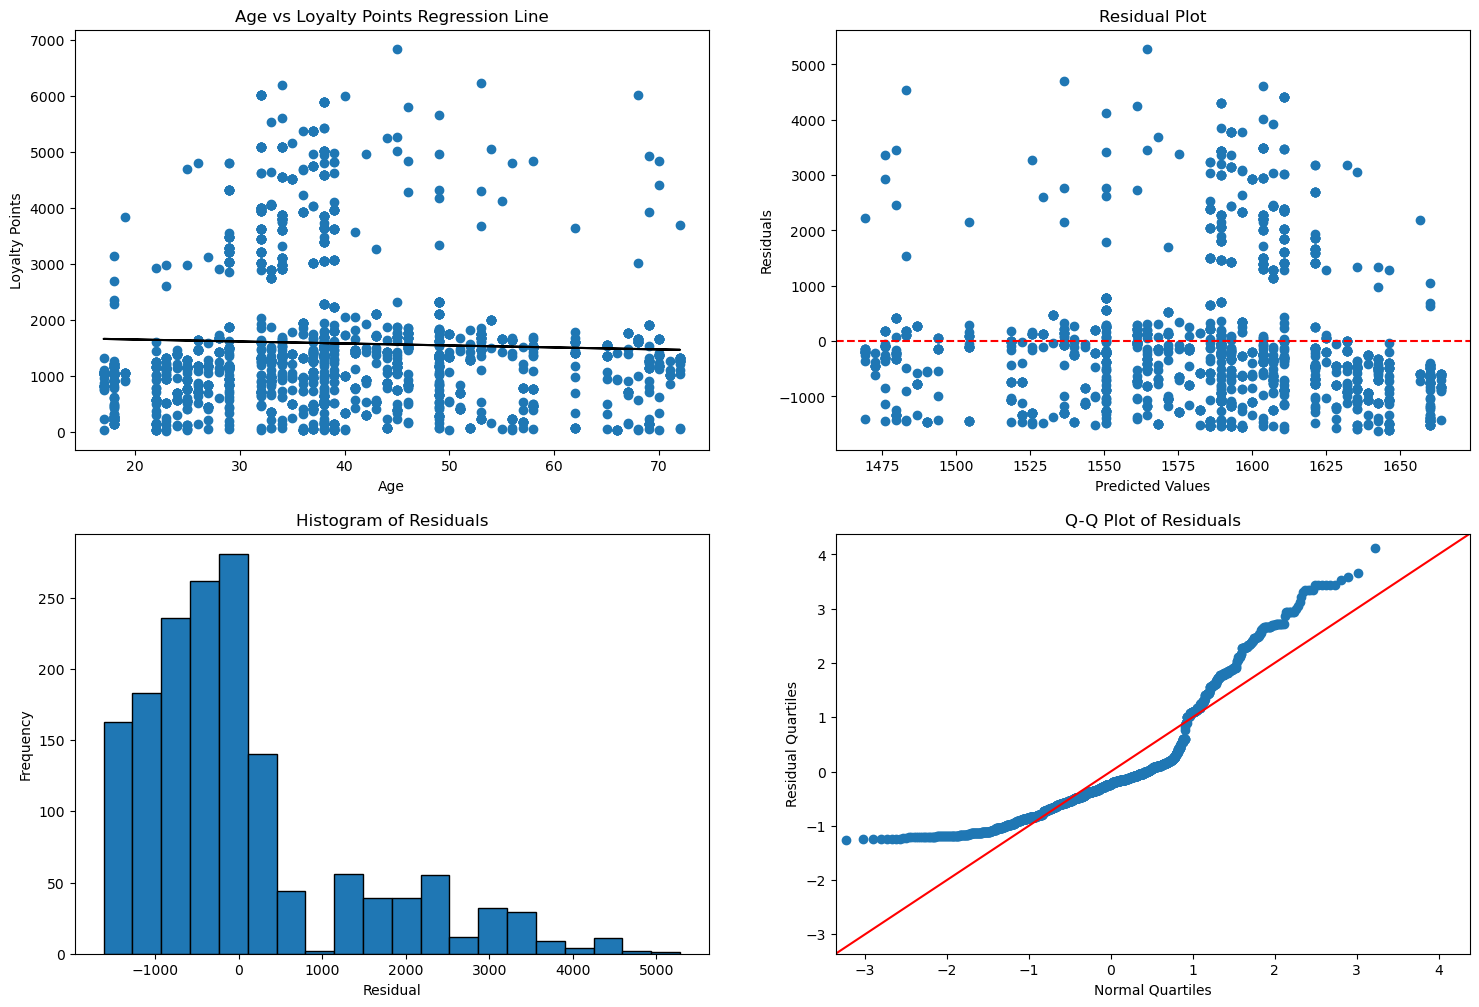

In [17]:
X = ['age']
lin_reg(reviews, X, 'loyalty_points')

**There is little correlation between age and loyalty points. That said, there's a chance that including age could improve the fit of a multiple linear regression.**

### Simple Linear Regression: Income vs Loyalty Points

Predicted y values (head and tail):
[ 773.57396472 2147.19017167 1975.4881458  1689.31810268 1574.85008544]
...
[2347.50920185 1460.38206819  744.95696041 1231.4460337  2004.10515011] 

Mean Absolute Error: 748.4645813598493
Mean Squared Error: 1106063.543763317
Root Mean Squared Error: 1051.6955565957844
R-squared for training set:  39.42033404299261
R-squared for test set:  31.794892012703492 

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     1040.
Date:                Mon, 14 Apr 2025   Prob (F-statistic):          3.81e-176
Time:                        14:23:47   Log-Likelihood:                -13323.
No. Observations:                1600   AIC:                         2.665e+04
Df Residuals:                    1598   BIC:   

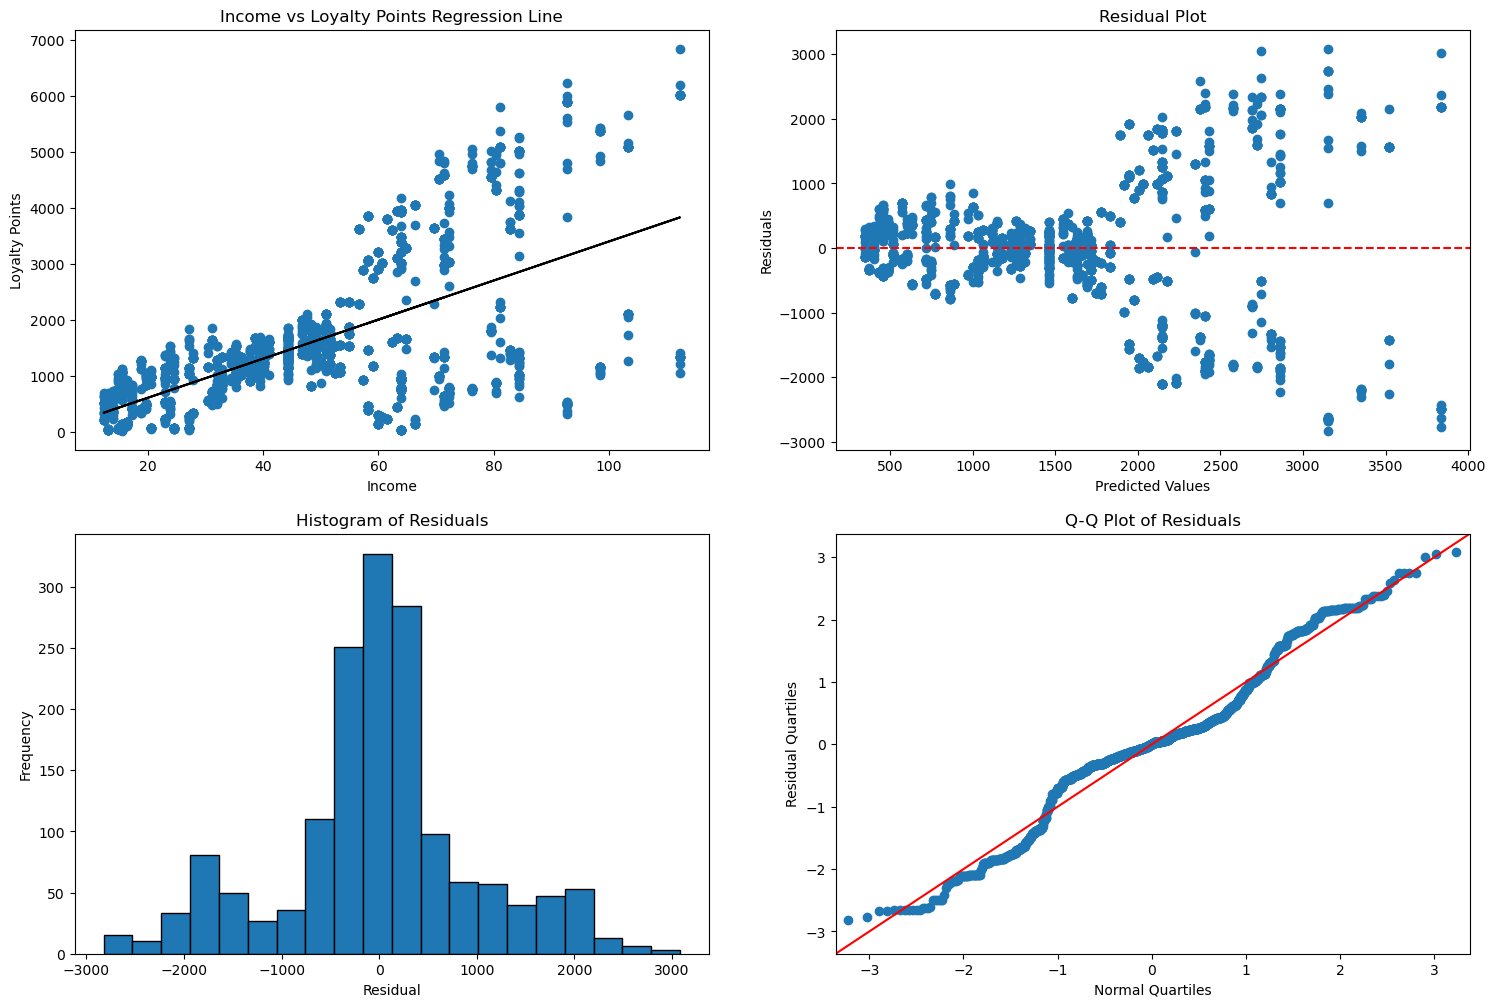

In [18]:
X = ['income']
lin_reg(reviews, X, 'loyalty_points')

**Income has a stronger correlation with loyalty points than age, but the regression does not fulifll the assumption of homoscedasticity because the residuals fan out on the residuals plot.** 

### Simple Linear Regression: Spending Score vs Loyalty Points

Predicted y values (head and tail):
[  50.83207662 2435.00839173 2269.44059207 1309.14735404 1441.60159377]
...
[2401.8948318  1805.85075302 2799.25755099 1739.62363316 2832.37111092] 

Mean Absolute Error: 651.6958975724068
Mean Squared Error: 865341.5814675748
Root Mean Squared Error: 930.2373790960966
R-squared for training set:  44.83889403237179
R-squared for test set:  46.638946430618866 

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     1299.
Date:                Mon, 14 Apr 2025   Prob (F-statistic):          1.09e-208
Time:                        14:23:47   Log-Likelihood:                -13248.
No. Observations:                1600   AIC:                         2.650e+04
Df Residuals:                    1598   BIC:    

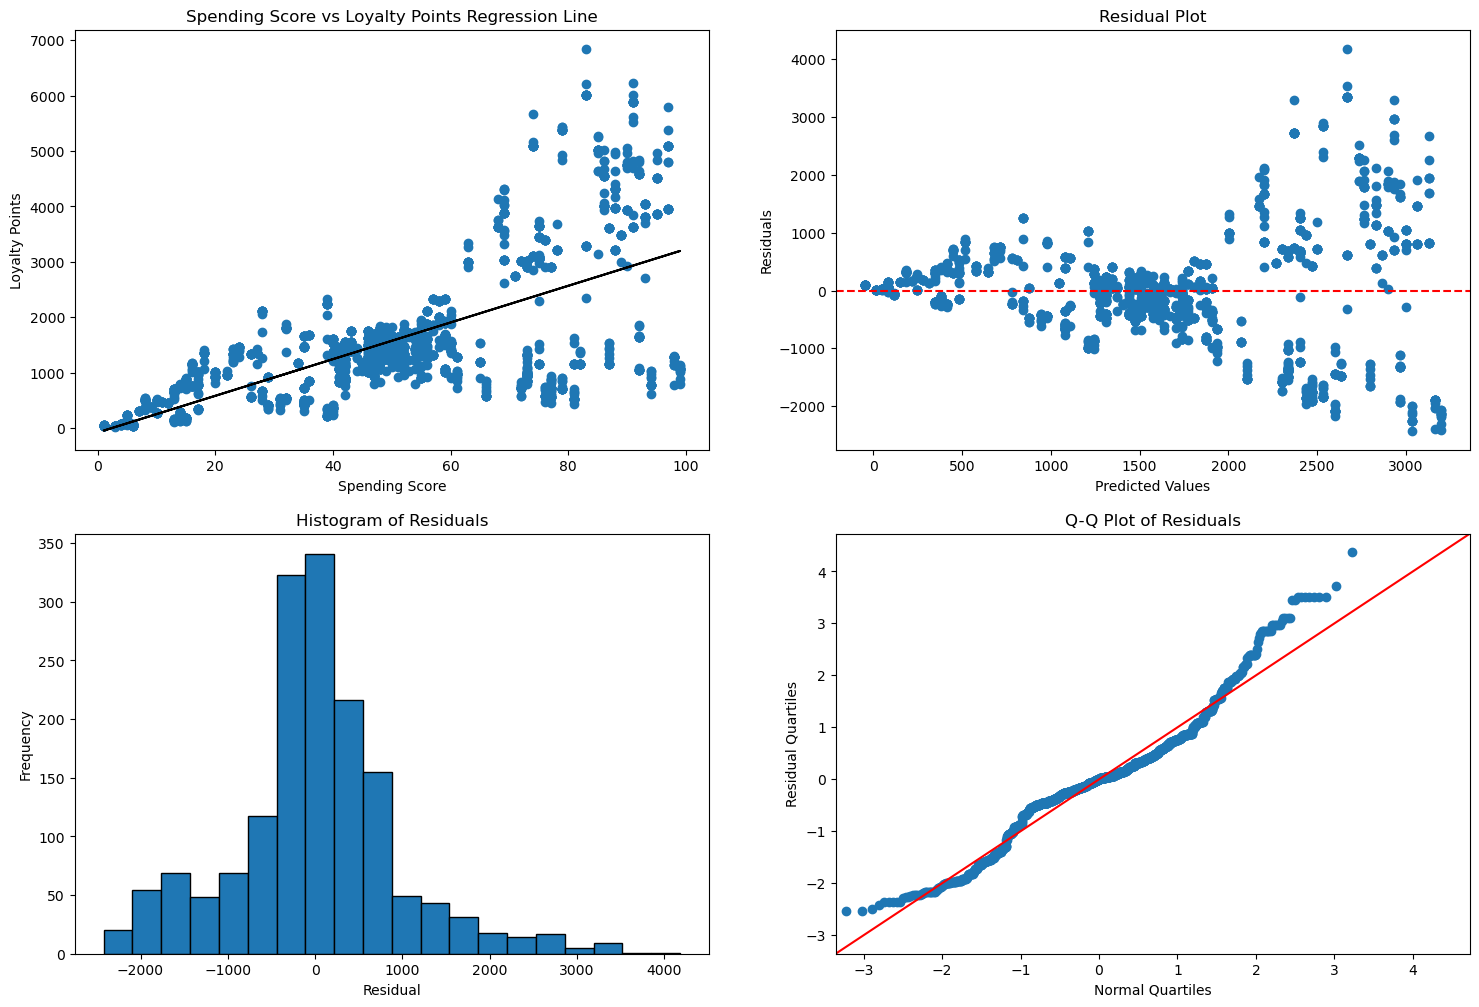

In [19]:
X = ['spending_score']
lin_reg(reviews, X, 'loyalty_points')

**Interpretation: The R-squared value for the test set is the highest of the three simple linear regression models and Prob (F-statistic) suggests significance. X coefficient is 33.1136 so for every 1-unit change in spending score there will be approximately a 33-unit change in loyalty points. Judging from the residual plot, which has an increasing trend, the model does not fulfill the homoscedasticity assumption. A multiple linear regression model will probably be a better fit.**

### Multiple Linear Regression: Age, Income, and Spending Score vs Loyalty Points

Predicted y values (head and tail):
[-425.70905334 2993.43558665 2600.03812077 1224.01268437 1533.91528656]
...
[3156.03758077 1508.88226961 1980.08022382 1161.22614553 3161.5220153 ] 

Mean Absolute Error: 402.23503056376927
Mean Squared Error: 277188.7023322059
Root Mean Squared Error: 526.4871340614184
R-squared for training set:  84.24891786265964
R-squared for test set:  82.90723396315803 

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     2846.
Date:                Mon, 14 Apr 2025   Prob (F-statistic):               0.00
Time:                        14:23:48   Log-Likelihood:                -12246.
No. Observations:                1600   AIC:                         2.450e+04
Df Residuals:                    1596   BIC:    

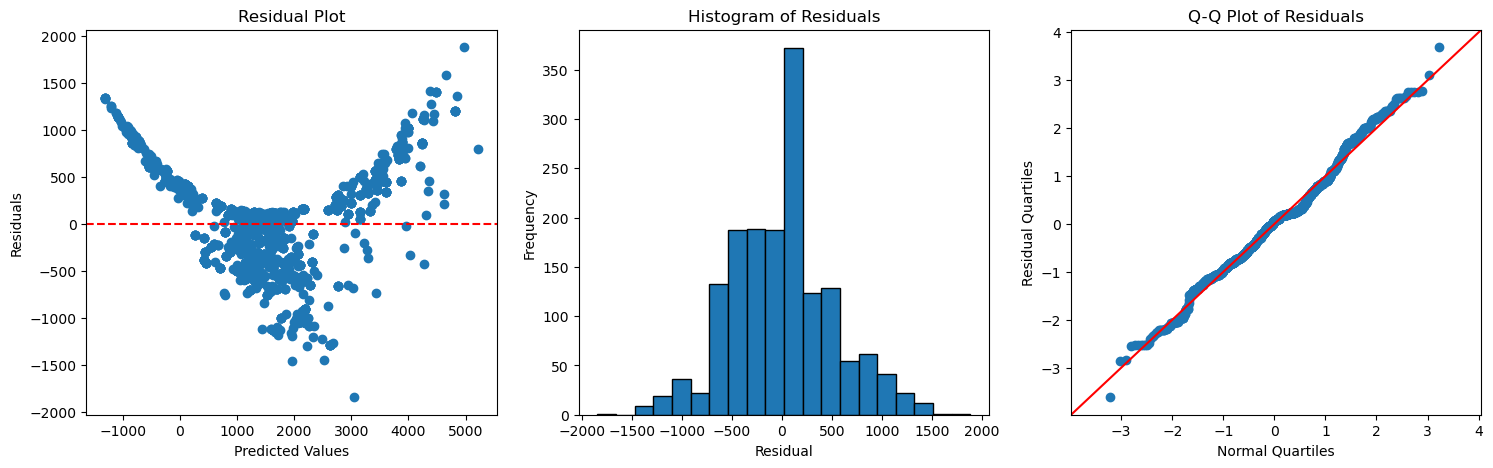

In [20]:
# Select x variables
X = ['age', 'income', 'spending_score']

# Run multiple linear regression function
lin_reg(reviews, X, 'loyalty_points')

**This model is a much better fit and on the basis of the adjusted R-squared value it explains 82.7% of the variation in the data. The VIF factor values indicate that there is no issue with multicollinearity.**

### Multiple Linear Regression: Income and Spending Score vs Loyalty Points

Predicted y values (head and tail):
[-725.11711735 2976.65149188 2644.50590347 1416.28990278 1434.2479047 ]
...
[3141.08822013 1680.71301019 1956.16988192 1390.19029468 3227.60609785] 

Mean Absolute Error: 429.66362016909125
Mean Squared Error: 300944.0917834269
Root Mean Squared Error: 548.5837144715716
R-squared for training set:  82.98594267896443
R-squared for test set:  81.44236432529975 

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     3895.
Date:                Mon, 14 Apr 2025   Prob (F-statistic):               0.00
Time:                        14:23:48   Log-Likelihood:                -12307.
No. Observations:                1600   AIC:                         2.462e+04
Df Residuals:                    1597   BIC:    

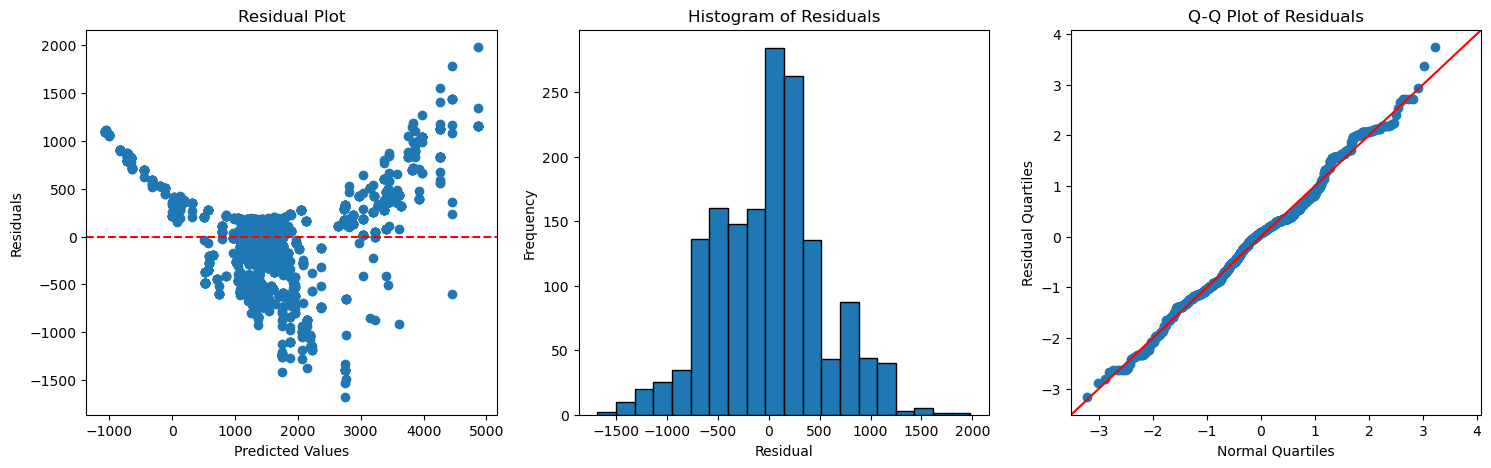

In [21]:
# Select x variables
X = ['income', 'spending_score']

# Run multiple linear regression function
lin_reg(reviews, X, 'loyalty_points')

**I think this is the best model even though it has a slightly lower adjusted R-squared value (81.3) because it is simpler (fewer features) and it avoids using age, which is a form of personal information that people are reluctant to share.**

## Data Modelling: Decision Tree Regression

### Data Cleaning and Transformation

In [22]:
# Create new dataframe from reviews_clean.csv
decision = pd.read_csv('reviews_clean.csv')

decision

,gender,age,income,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [23]:
# Make dummy variables for categorical features
categorical_cols = ['gender', 'education']
decision = pd.get_dummies(decision, columns=categorical_cols, drop_first=True)

In [24]:
# View dataframe
decision

,age,income,spending_score,loyalty_points,product,review,summary,gender_Male,education_PhD,education_diploma,education_graduate,education_postgraduate
0,18,12.30,39,210,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,True,False,False,True,False
1,23,12.30,81,524,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,True,False,False,True,False
2,22,13.12,6,40,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",False,False,False,True,False
3,25,13.12,77,562,263,Amazing buy! Bought it as a gift for our new d...,Five Stars,False,False,False,True,False
4,33,13.94,40,366,291,As my review of GF9's previous screens these w...,Money trap,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,37,84.46,69,4031,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom,False,True,False,False,False
1996,43,92.66,8,539,979,Great game. Did not think I would like it whe...,Super fun,False,True,False,False,False
1997,34,92.66,91,5614,1012,Great game for all.........\nKeeps the mind ni...,Great Game,True,False,False,True,False
1998,34,98.40,16,1048,1031,fun game!,Four Stars,True,True,False,False,False


**There are now multiple columns for education and they are Boolean data types, as is the gender column.**

In [25]:
# Drop unnecessary columns.
decision.drop(['review', 'summary', 'product'], axis=1, inplace=True)

In [26]:
# View dataframe
decision

,age,income,spending_score,loyalty_points,gender_Male,education_PhD,education_diploma,education_graduate,education_postgraduate
0,18,12.30,39,210,True,False,False,True,False
1,23,12.30,81,524,True,False,False,True,False
2,22,13.12,6,40,False,False,False,True,False
3,25,13.12,77,562,False,False,False,True,False
4,33,13.94,40,366,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
1995,37,84.46,69,4031,False,True,False,False,False
1996,43,92.66,8,539,False,True,False,False,False
1997,34,92.66,91,5614,True,False,False,True,False
1998,34,98.40,16,1048,True,True,False,False,False


**I dropped the review, summary, and product columns because they are not attributes of customers.**

### Create Train and Test Data Sets

In [27]:
# Isolate the independent variables from loyalty_points
cols = decision.columns[decision.columns != 'loyalty_points']  

# Specify X as independent variables and y as dependent variable.
X = decision[cols]
y = decision['loyalty_points']

# Split the data training and testing 20/80.
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [28]:
# Create list of feature column names
feature_cols = [c for c in X.columns]
feature_cols

['age',
 'income',
 'spending_score',
 'gender_Male',
 'education_PhD',
 'education_diploma',
 'education_graduate',
 'education_postgraduate']

### Create the Decision Tree Regressor

In [29]:
# Create the 'DecisionTreeRegressor' class 
regressor = DecisionTreeRegressor(random_state=42)

# Fit the regressor object to the data set.
regressor.fit(X_train,y_train)  

# Predict TotalCharges on test data
y_pred = regressor.predict(X_test)

### Evaluate the Model

In [30]:
#Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 6554.8225
Mean Absolute Error: 30.0525
R-squared: 0.9959579865101699
Root Mean Squared Error: 80.96185830377166


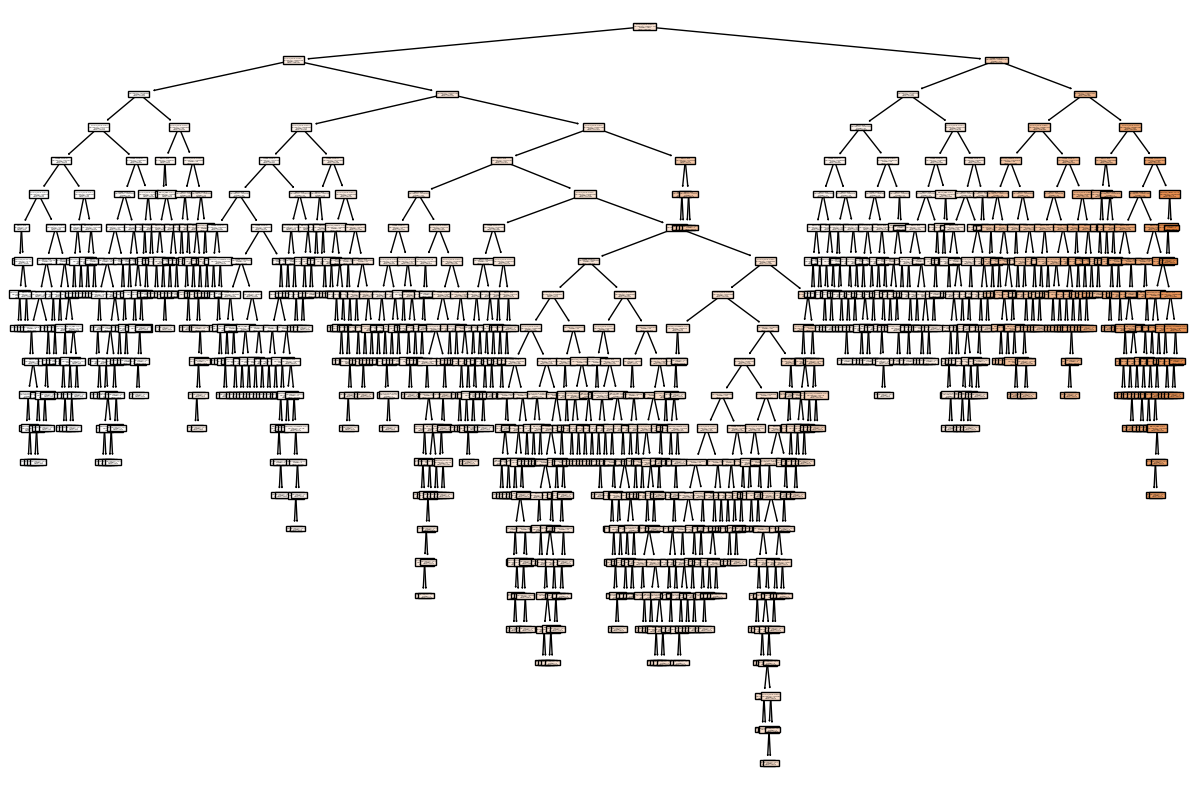

In [31]:
# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(regressor, feature_names=feature_cols, filled=True)
plt.show()

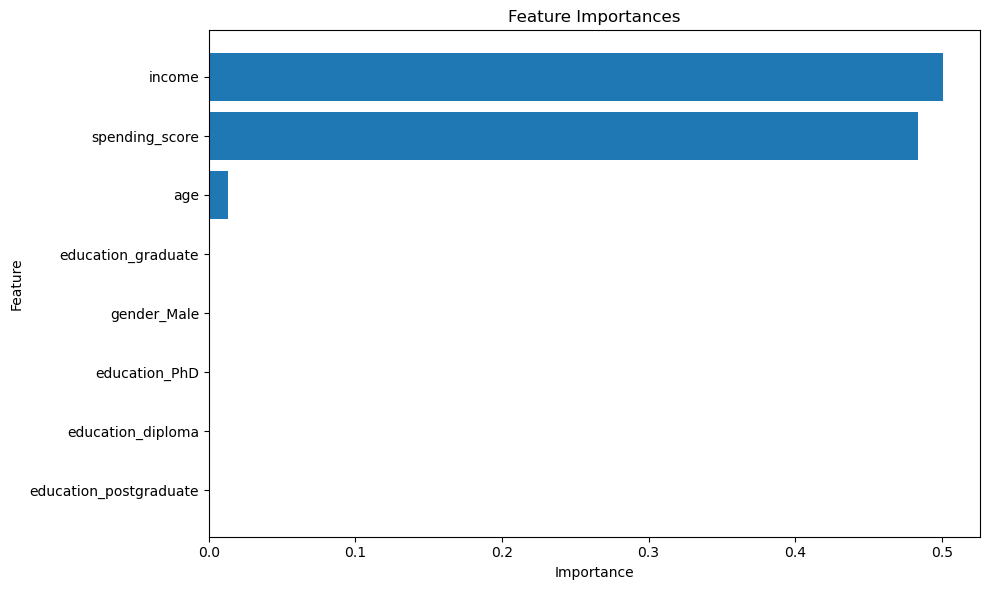

In [32]:
#Extract feature importances
feature_importances = regressor.feature_importances_

#Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_cols, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

#Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

**Neither of the categorical variables (gender and eduction) are important features in this decision tree regression model.**

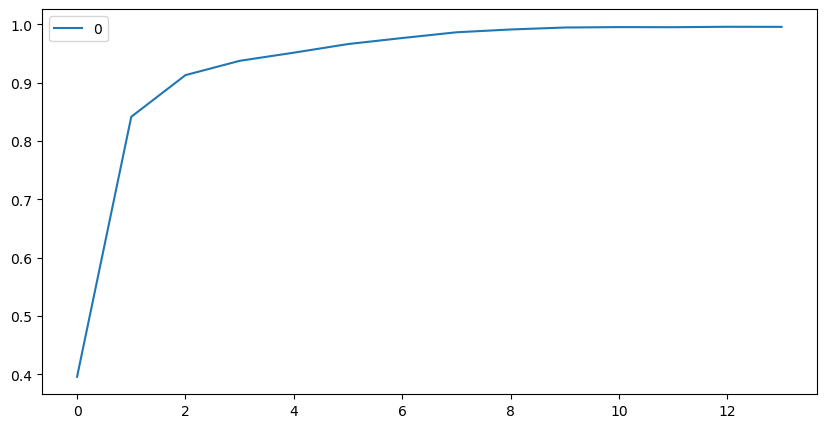

In [33]:
# Determine the optimal value for max depth

# Make list of values to try for max_depth
max_depth_range = list(range(1, 15))

# have a loop that fits decision trees for different 'max_depth', and calculate/store the accuracy of each tree
accuracy = []
for depth in max_depth_range:    
    regressor2 = DecisionTreeRegressor(max_depth = depth, random_state = 42)
    regressor2.fit(X_train, y_train)
    score = regressor2.score(X_test, y_test)
    accuracy.append(score)
    
# Plot accuracy values across the range of depth values evaluated
plt.rcParams['figure.figsize'] = [10, 5]
accuracy = pd.DataFrame(accuracy)
accuracy.plot()
plt.show()

**A depth between 2 and 4 seems promising. Let's try pruning at depths in that range.**

In [34]:
# Prune the model to a max depth of 2
dtr = DecisionTreeRegressor(max_depth=2, random_state=42)

In [35]:
#Train Decision Tree Regressor
dtr.fit(X_train, y_train)

#Predict TotalCharges on test data
y_pred_pruned = dtr.predict(X_test)

#Evaluate the pruned model
mse_pruned = mean_squared_error(y_test, y_pred_pruned)
mae_pruned = mean_absolute_error(y_test, y_pred_pruned)
rmse_pruned = mean_squared_error(y_test, y_pred_pruned, squared=False)
r2_pruned = r2_score(y_test, y_pred_pruned)

print(f"Pruned Model Mean Squared Error: {mse_pruned}")
print(f"Pruned Model Mean Absolute Error: {mae_pruned}")
print(f"Pruned Model R-squared: {r2_pruned}")
print(f"Root Mean Squared Error: {rmse_pruned}")

Pruned Model Mean Squared Error: 257095.61881103038
Pruned Model Mean Absolute Error: 369.4009081374513
Pruned Model R-squared: 0.8414626850062833
Root Mean Squared Error: 507.0459730744643


**This R-squared value is not much better than that of the multiple linear regression model.**

In [36]:
# Prune the model to a max depth of 3
dtr = DecisionTreeRegressor(max_depth=3, random_state=42)

In [37]:
#Train Decision Tree Regressor
dtr.fit(X_train, y_train)

#Predict TotalCharges on test data
y_pred_pruned = dtr.predict(X_test)

#Evaluate the pruned model
mse_pruned = mean_squared_error(y_test, y_pred_pruned)
mae_pruned = mean_absolute_error(y_test, y_pred_pruned)
rmse_pruned = mean_squared_error(y_test, y_pred_pruned, squared=False)
r2_pruned = r2_score(y_test, y_pred_pruned)

print(f"Pruned Model Mean Squared Error: {mse_pruned}")
print(f"Pruned Model Mean Absolute Error: {mae_pruned}")
print(f"Pruned Model R-squared: {r2_pruned}")
print(f"Root Mean Squared Error: {rmse_pruned}")

Pruned Model Mean Squared Error: 141276.38891623393
Pruned Model Mean Absolute Error: 271.8726068995849
Pruned Model R-squared: 0.9128822985223626
Root Mean Squared Error: 375.86751511168654


**This R-squared value indicates that a max depth of 3 provides a much better fit. There's room for improvement, but it is worth having a more complex model?**

In [38]:
# Prune the model to a max depth of 4
dtr = DecisionTreeRegressor(max_depth=4, random_state=42)

In [39]:
#Train Decision Tree Regressor
dtr.fit(X_train, y_train)

#Predict TotalCharges on test data
y_pred_pruned = dtr.predict(X_test)

#Evaluate the pruned model
mse_pruned = mean_squared_error(y_test, y_pred_pruned)
mae_pruned = mean_absolute_error(y_test, y_pred_pruned)
rmse_pruned = mean_squared_error(y_test, y_pred_pruned, squared=False)
r2_pruned = r2_score(y_test, y_pred_pruned)

print(f"Pruned Model Mean Squared Error: {mse_pruned}")
print(f"Pruned Model Mean Absolute Error: {mae_pruned}")
print(f"Pruned Model R-squared: {r2_pruned}")
print(f"Root Mean Squared Error: {rmse_pruned}")

Pruned Model Mean Squared Error: 101534.30153465537
Pruned Model Mean Absolute Error: 225.96840032314753
Pruned Model R-squared: 0.9373891487552022
Root Mean Squared Error: 318.6444751359348


**A max depth of 4 provides a slightly better fit, but for the sake of simplicity I think a max depth of 3 is sufficient.**

### Fit and Plot Final Model

In [40]:
# Prune the model to a max depth of 3
dtr = DecisionTreeRegressor(max_depth=3, random_state=42)

In [41]:
#Train Decision Tree Regressor
dtr.fit(X_train, y_train)

#Predict TotalCharges on test data
y_pred_pruned = dtr.predict(X_test)

#Evaluate the pruned model
mse_pruned = mean_squared_error(y_test, y_pred_pruned)
mae_pruned = mean_absolute_error(y_test, y_pred_pruned)
rmse_pruned = mean_squared_error(y_test, y_pred_pruned, squared=False)
r2_pruned = r2_score(y_test, y_pred_pruned)

print(f"Pruned Model Mean Squared Error: {mse_pruned}")
print(f"Pruned Model Mean Absolute Error: {mae_pruned}")
print(f"Pruned Model R-squared: {r2_pruned}")
print(f"Root Mean Squared Error: {rmse_pruned}")

Pruned Model Mean Squared Error: 141276.38891623393
Pruned Model Mean Absolute Error: 271.8726068995849
Pruned Model R-squared: 0.9128822985223626
Root Mean Squared Error: 375.86751511168654


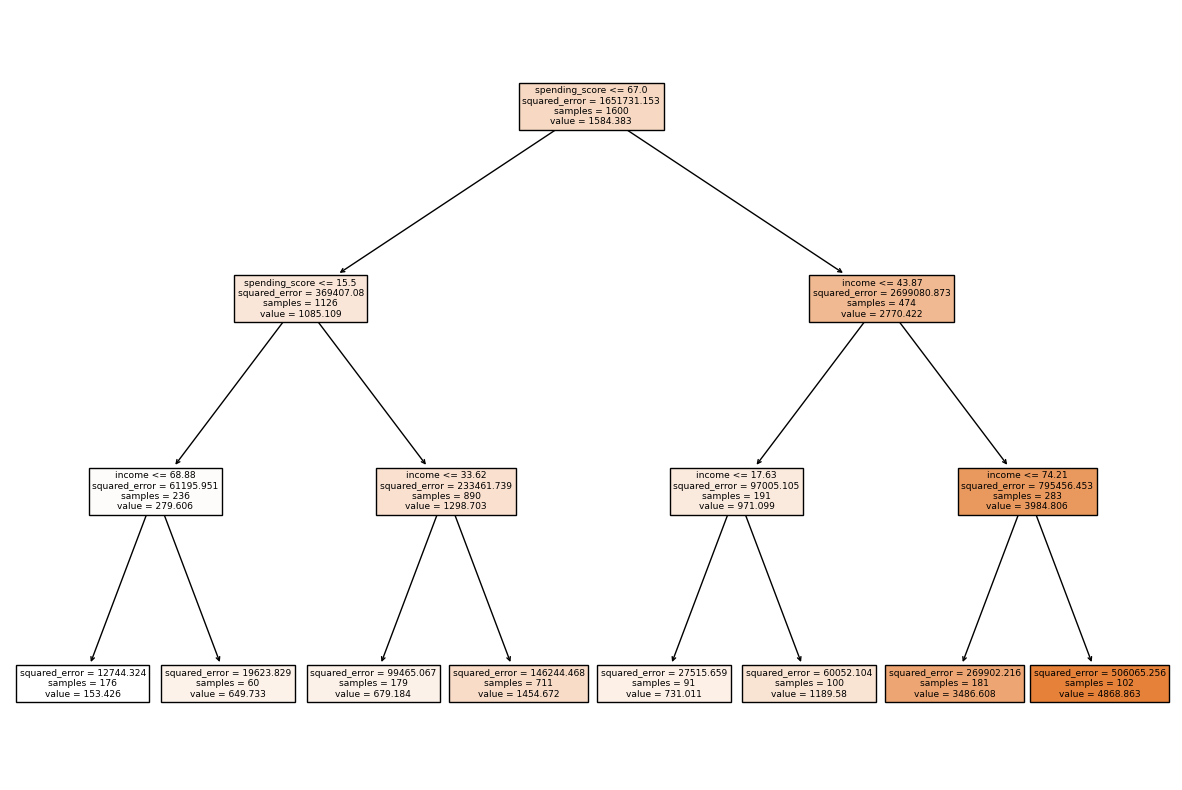

In [42]:
# Fit, save, and plot final model.
plt.figure(figsize=(15, 10))
plot_tree(dtr, feature_names=feature_cols, filled=True)
plt.savefig('decision_tree.png')
plt.show()

## Data Modelling: Clustering

### Data Loading and Cleaning

In [43]:
# Load the reviews_clean.csv file in new dataframe
cluster = pd.read_csv('reviews_clean.csv')

# View DataFrame.
cluster

,gender,age,income,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [44]:
# Drop unnecessary columns.
cluster.drop(['gender', 'age', 'loyalty_points', 'education', 'product', 'review', 'summary'], axis=1, inplace=True)

# View DataFrame.
cluster

,income,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40
...,...,...
1995,84.46,69
1996,92.66,8
1997,92.66,91
1998,98.40,16


### Determine the Number of Clusters

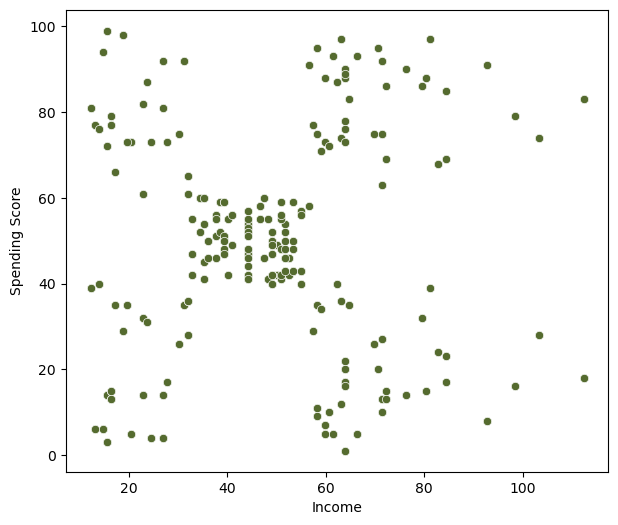

In [45]:
#Clean labels
clean_income = clean_label('income')
clean_spending = clean_label('spending_score')

# Create a scatterplot with Seaborn.
plt.figure(figsize=(7, 6))
ax = sns.scatterplot(x='income',
                y='spending_score',
                data=cluster, color='darkolivegreen')
ax.set(xlabel=clean_income, ylabel=clean_spending)

# Save plot
fig = ax.get_figure()
fig.savefig("income_spending.png", bbox_inches = "tight")

**Visually it looks like there are 5 clusters.**

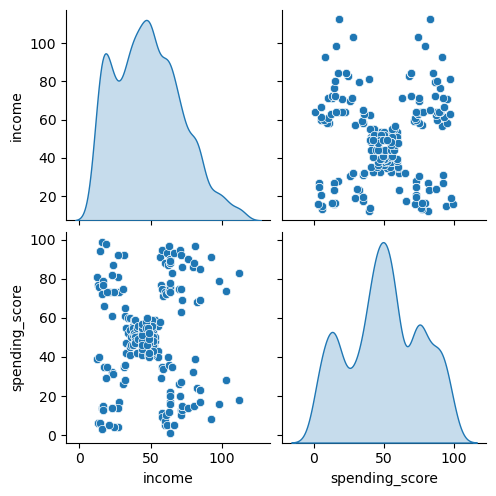

In [46]:
# Create a pairplot with Seaborn.
x = cluster[['income', 'spending_score']]

sns.pairplot(cluster,
             vars=x,
             diag_kind='kde')

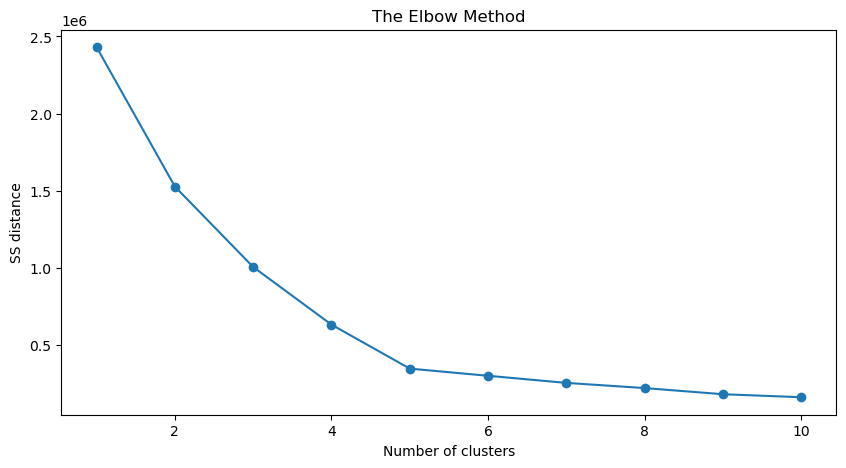

In [47]:
# Determine the number of clusters: Elbow method.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

plt.show()

**5 seems like a good number of clusters using the elbow method.**

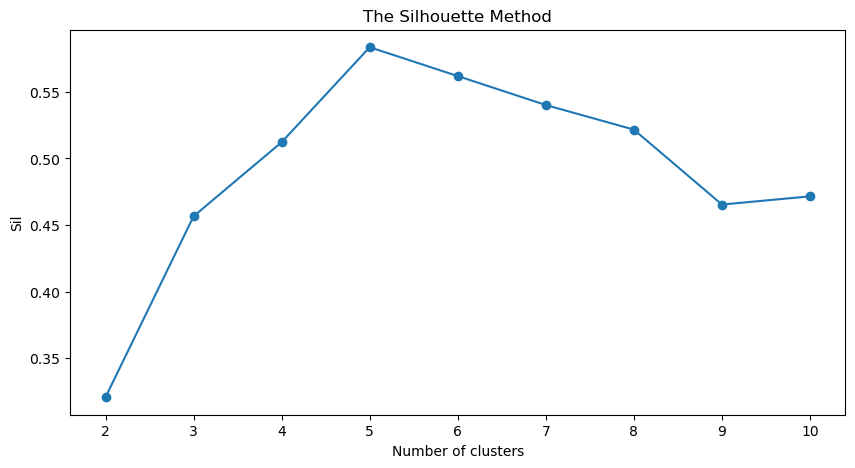

In [48]:
# Determine the number of clusters: Silhouette method
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

**This method also suggests that 5 clusters is a good fit.**

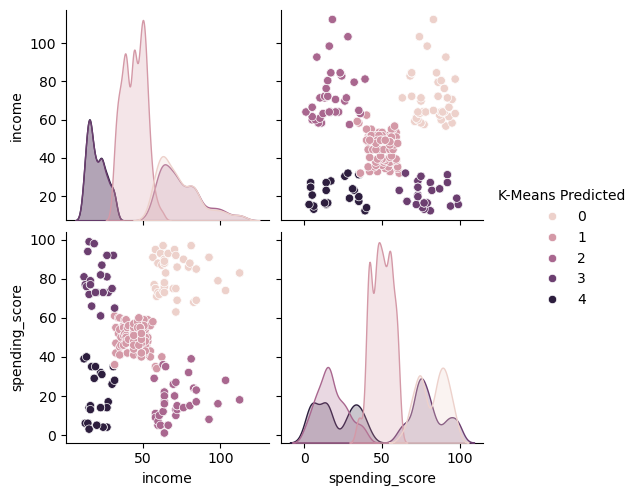

In [49]:
# Use five clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

**This looks good, but it doesn't hurt to try four and six clusters just to be sure.**

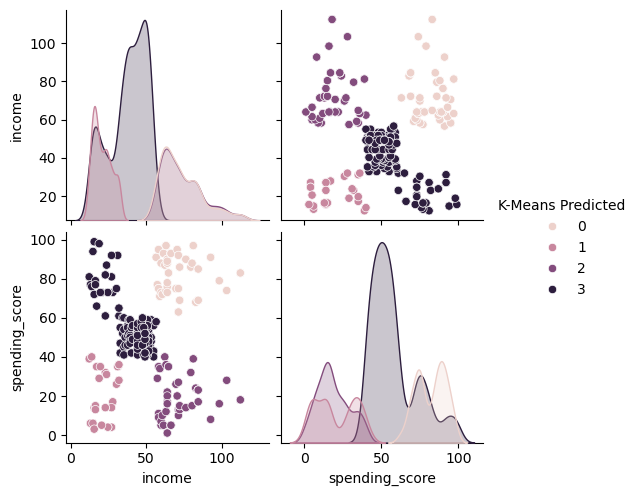

In [50]:
# Use four clusters.
kmeans = KMeans(n_clusters = 4, 
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

**Cluster 3 seems arbitrary: why does it spread out in one direction but not the others?**

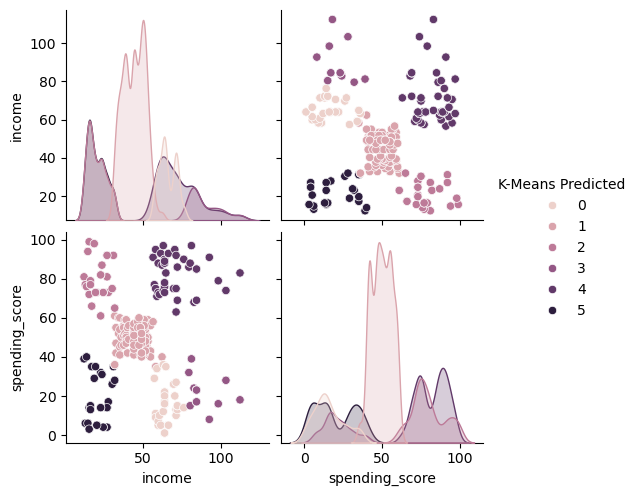

In [51]:
# Use six clusters.
kmeans = KMeans(n_clusters = 6, 
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

##### **Cluster 3 seems small relative to the other five clusters. Sticking with 5 clusters total is the best fit.**

### Fit Final Model

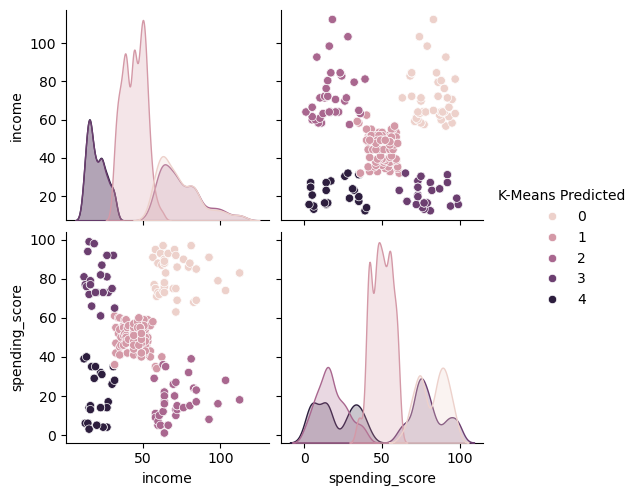

In [52]:
# Use five clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [53]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

K-Means Predicted
1    774
0    356
2    330
4    271
3    269
Name: count, dtype: int64

In [54]:
# View the K-Means predicted.
print(x.head())

   income  spending_score  K-Means Predicted
0   12.30              39                  4
1   12.30              81                  3
2   13.12               6                  4
3   13.12              77                  3
4   13.94              40                  4


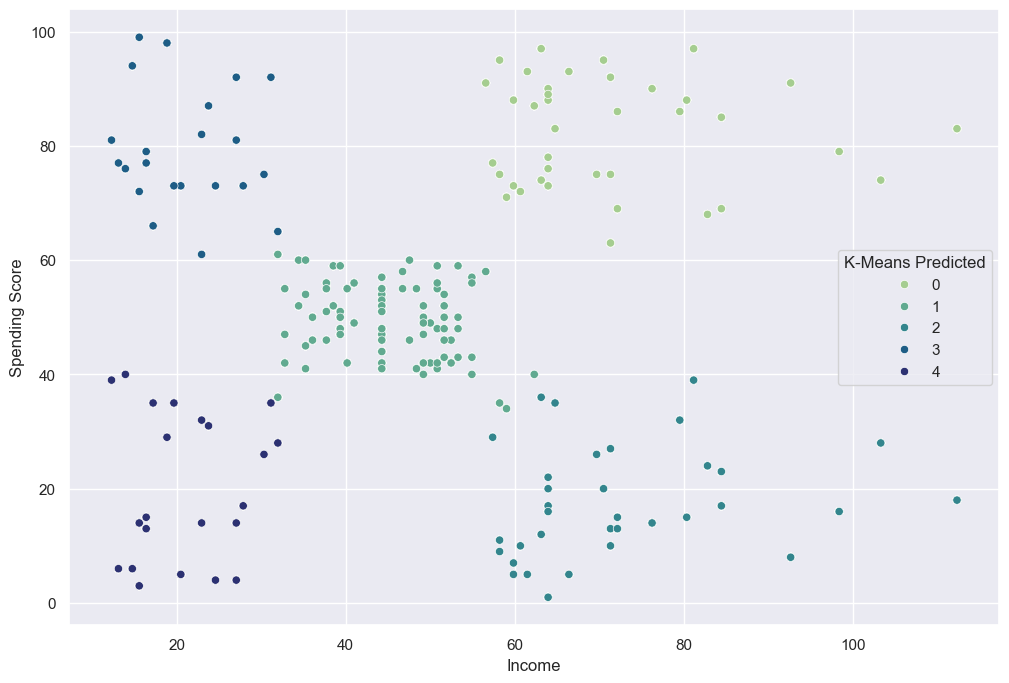

In [55]:
# Set plot size
sns.set(rc = {'figure.figsize':(12, 8)})
# Visualize the clusters
sns.scatterplot(x='income', 
                y ='spending_score',
                data=x , hue='K-Means Predicted', palette='crest')
# Set x-axis label
plt.xlabel('Income')
# Set y-axis label
plt.ylabel('Spending Score')
plt.savefig('clusters.png')

**Low income and high income customers are split between low spenders and high spenders whereas middle income customers have spending scores in the middle. Do any patterns emerge if we map other variables, such as education or gender onto these clusters?**

In [56]:
# Load the reviews_clean.csv as a new dataframe
cluster_hues = pd.read_csv('reviews_clean.csv')

# View DataFrame.
cluster_hues

,gender,age,income,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


<Axes: xlabel='income', ylabel='spending_score'>

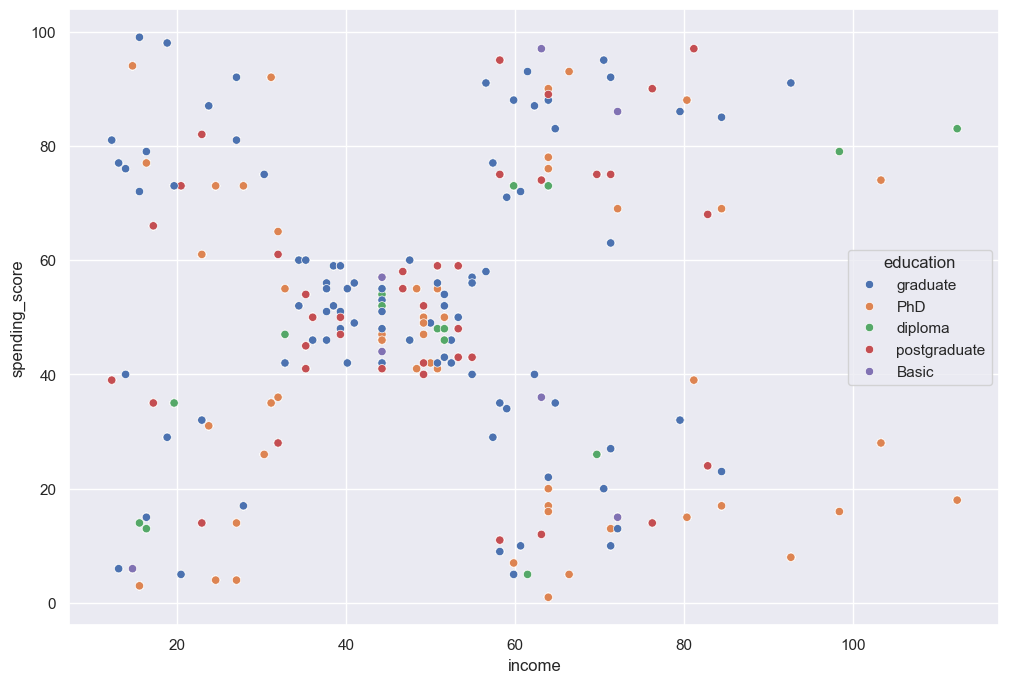

In [57]:
# Create a scatterplot with education as the hue
sns.scatterplot(x='income',
                y='spending_score', hue='education',
                data=cluster_hues,)

**There does not appear to be a pattern related to education in these clusters.**

<Axes: xlabel='income', ylabel='spending_score'>

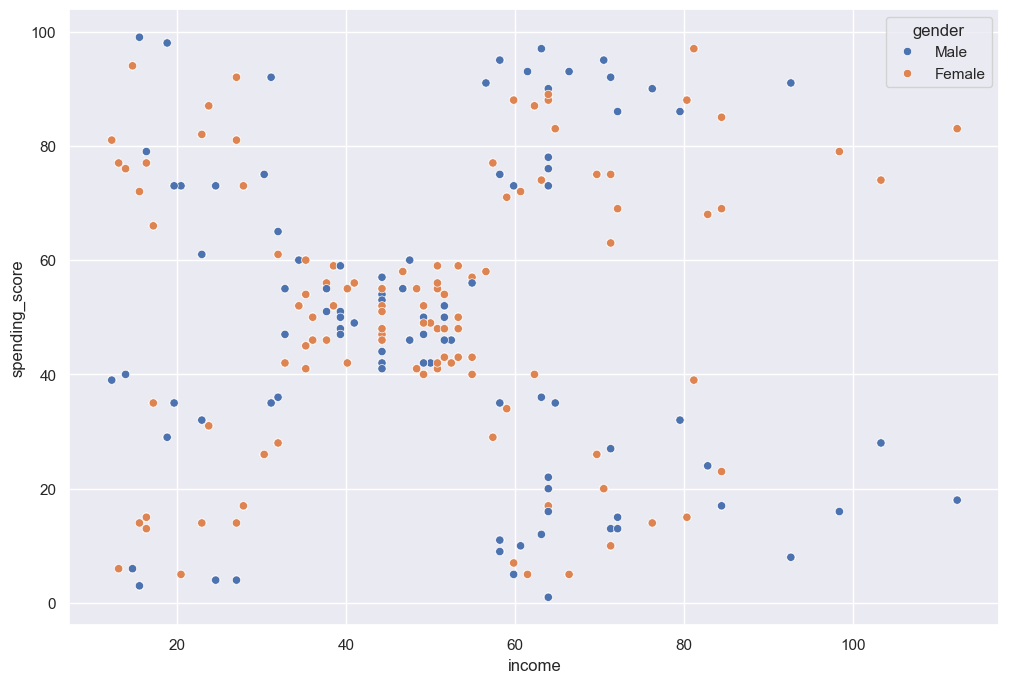

In [58]:
# Create a scatterplot with gender as the hue
sns.scatterplot(x='income',
                y='spending_score', hue='gender',
                data=cluster_hues,)

**There does not appear to be a pattern with respect to gender in these clusters.**

In [59]:
# Load the reviews_clean.csv file in new dataframe
reviews_cluster = pd.read_csv('reviews_clean.csv')

In [60]:
reviews_cluster

,gender,age,income,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [61]:
# Add K-means predicted values to the main dataframe
reviews_cluster = reviews_cluster.set_index(['income', 'spending_score'])
x = x.set_index(['income', 'spending_score'])

# Then join the K-Means column
reviews_cluster['kmeans_cluster'] = x['K-Means Predicted']

# Reset index if needed
reviews_cluster = reviews_cluster.reset_index()

In [62]:
reviews_cluster

,income,spending_score,gender,age,loyalty_points,education,product,review,summary,kmeans_cluster
0,12.30,39,Male,18,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,4
1,12.30,81,Male,23,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,3
2,13.12,6,Female,22,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",4
3,13.12,77,Female,25,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars,3
4,13.94,40,Female,33,366,graduate,291,As my review of GF9's previous screens these w...,Money trap,4
...,...,...,...,...,...,...,...,...,...,...
1995,84.46,69,Female,37,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom,0
1996,92.66,8,Female,43,539,PhD,979,Great game. Did not think I would like it whe...,Super fun,2
1997,92.66,91,Male,34,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game,0
1998,98.40,16,Male,34,1048,PhD,1031,fun game!,Four Stars,2


In [63]:
# Create your mapping dictionary
cluster_mapping = {
    0: 'High Income High Spend',
    1: 'Middle Income Middle Spend',
    2: 'High Income Low Spend',
    3: 'Low Income High Spend',
    4: 'Low Income Low Spend'
}

# Apply the mapping
reviews_cluster['cluster_description'] = reviews_cluster['kmeans_cluster'].map(cluster_mapping)

In [64]:
reviews_cluster

,income,spending_score,gender,age,loyalty_points,education,product,review,summary,kmeans_cluster,cluster_description
0,12.30,39,Male,18,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,4,Low Income Low Spend
1,12.30,81,Male,23,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,3,Low Income High Spend
2,13.12,6,Female,22,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",4,Low Income Low Spend
3,13.12,77,Female,25,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars,3,Low Income High Spend
4,13.94,40,Female,33,366,graduate,291,As my review of GF9's previous screens these w...,Money trap,4,Low Income Low Spend
...,...,...,...,...,...,...,...,...,...,...,...
1995,84.46,69,Female,37,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom,0,High Income High Spend
1996,92.66,8,Female,43,539,PhD,979,Great game. Did not think I would like it whe...,Super fun,2,High Income Low Spend
1997,92.66,91,Male,34,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game,0,High Income High Spend
1998,98.40,16,Male,34,1048,PhD,1031,fun game!,Four Stars,2,High Income Low Spend


**Sense check: The head and tail of the table include rows from four out of the five clusters and the the descriptions for these clusters looks accurate. For example, a customer with an income of £13.12k and spending score of 6 is in the "Low Income Low Spending" cluster.**

In [65]:
# Create CSV file as output.
reviews_cluster.to_csv('reviews_cluster.csv', index=False)

**By saving this dataframe as a .csv file I can easily load it into R Studio if I want to use R for specific tasks like making visualisations with the ggplot2 package.**

### Exploratory Data Analysis: Median Loyalty Points by Income/Spending Score Clusters

In [66]:
# Group by cluster_description and aggregate by median loyalty points
cluster_points= reviews_cluster.groupby(['cluster_description'])['loyalty_points'].median().sort_values().reset_index()
cluster_points

,cluster_description,loyalty_points
0,Low Income Low Spend,236.0
1,High Income Low Spend,874.0
2,Low Income High Spend,969.0
3,Middle Income Middle Spend,1393.0
4,High Income High Spend,3866.0


**I chose median as the measure of central tendency because the boxplot of loyalty_points revealed quite a few outliers.**

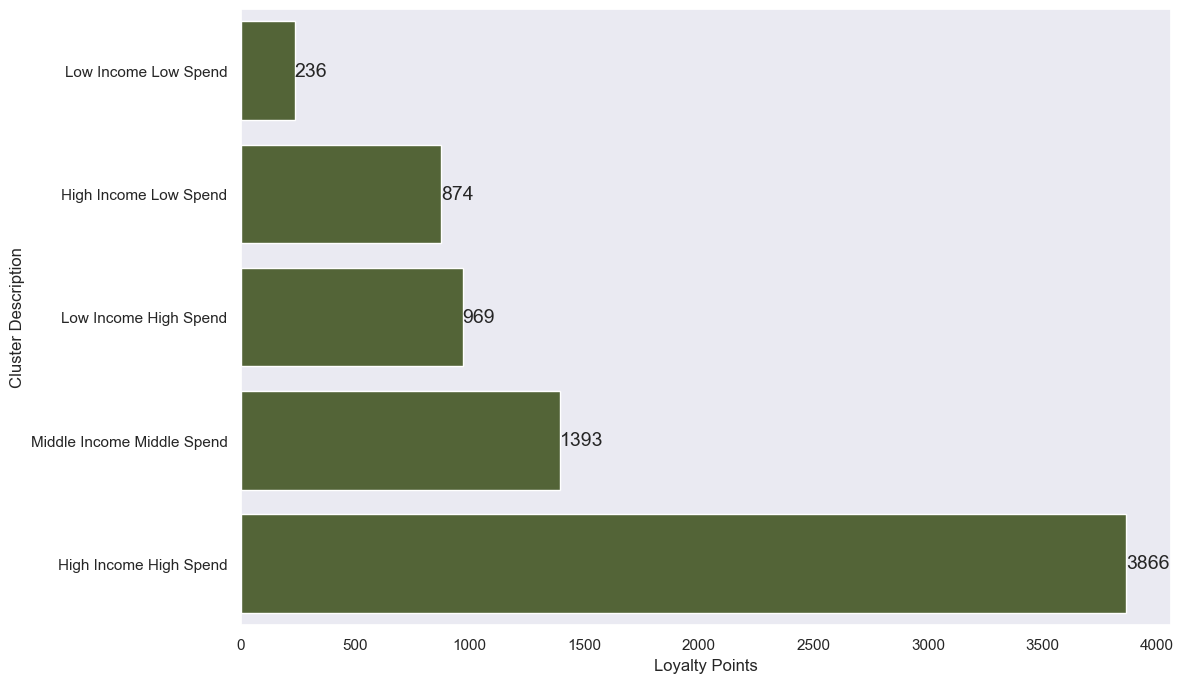

In [67]:
# Clean labels
clean_cluster = clean_label('cluster_description')
clean_loyalty = clean_label('loyalty_points')

# Horizontal bar plot with value labels and no grid lines
ax = sns.barplot(cluster_points, y="cluster_description", x="loyalty_points", orient="h", color='darkolivegreen')
ax.bar_label(ax.containers[0], fontsize=14)
ax.set(xlabel=clean_loyalty, ylabel=clean_cluster)
ax.grid(False)

fig = ax.get_figure()
fig.savefig("cluster_loyalty.png", bbox_inches = "tight")

**It's not surprising that there's a wide range of median loyalty point values across these groups. At the extremes, one would expect customers with low incomes and low spending scores to accumulate the fewest loyalty points and customers with high incomes and high spending scores to accumulate the most loyalty points. But these points could be used not only to reward big spenders but also to incentivize customers with lower spending scores and mid-to-high incomes to buy more products from Turtle Games.**

## Sentiment Analysis

In [68]:
### Load and Prepare the Data for NLP

In [69]:
# Load the reviews_cluster.csv as new dataframe.
reviews_sentiment = pd.read_csv('reviews_cluster.csv')

# View dataframe
reviews_sentiment

,income,spending_score,gender,age,loyalty_points,education,product,review,summary,kmeans_cluster,cluster_description
0,12.30,39,Male,18,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,4,Low Income Low Spend
1,12.30,81,Male,23,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,3,Low Income High Spend
2,13.12,6,Female,22,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",4,Low Income Low Spend
3,13.12,77,Female,25,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars,3,Low Income High Spend
4,13.94,40,Female,33,366,graduate,291,As my review of GF9's previous screens these w...,Money trap,4,Low Income Low Spend
...,...,...,...,...,...,...,...,...,...,...,...
1995,84.46,69,Female,37,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom,0,High Income High Spend
1996,92.66,8,Female,43,539,PhD,979,Great game. Did not think I would like it whe...,Super fun,2,High Income Low Spend
1997,92.66,91,Male,34,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game,0,High Income High Spend
1998,98.40,16,Male,34,1048,PhD,1031,fun game!,Four Stars,2,High Income Low Spend


In [70]:
# Apply the cleaning function to review column
reviews_sentiment['cleaned_review'] = reviews_sentiment['review'].apply(preprocess_text)
# View dataframe
reviews_sentiment

,income,spending_score,gender,age,loyalty_points,education,product,review,summary,kmeans_cluster,cluster_description,cleaned_review
0,12.30,39,Male,18,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,4,Low Income Low Spend,comes dm screen space screen absolute premium ...
1,12.30,81,Male,23,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,3,Low Income High Spend,open letter galeforce9 unpainted miniatures no...
2,13.12,6,Female,22,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",4,Low Income Low Spend,nice art nice printing two panels filled gener...
3,13.12,77,Female,25,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars,3,Low Income High Spend,amazing buy bought gift new dm perfect
4,13.94,40,Female,33,366,graduate,291,As my review of GF9's previous screens these w...,Money trap,4,Low Income Low Spend,review gf9 previous screens completely unneces...
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,84.46,69,Female,37,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom,0,High Income High Spend,perfect word game mixed ages mom perhaps givin...
1996,92.66,8,Female,43,539,PhD,979,Great game. Did not think I would like it whe...,Super fun,2,High Income Low Spend,great game not think would like first received...
1997,92.66,91,Male,34,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game,0,High Income High Spend,great game keeps mind nimble
1998,98.40,16,Male,34,1048,PhD,1031,fun game!,Four Stars,2,High Income Low Spend,fun game


In [71]:
# Apply the cleaning function to summary column
reviews_sentiment['cleaned_summary'] = reviews_sentiment['summary'].apply(preprocess_text)
# View dataframe
reviews_sentiment

,income,spending_score,gender,age,loyalty_points,education,product,review,summary,kmeans_cluster,cluster_description,cleaned_review,cleaned_summary
0,12.30,39,Male,18,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,4,Low Income Low Spend,comes dm screen space screen absolute premium ...,fact 50 space wasted art not terribly informat...
1,12.30,81,Male,23,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,3,Low Income High Spend,open letter galeforce9 unpainted miniatures no...,another worthless dungeon master screen galefo...
2,13.12,6,Female,22,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",4,Low Income Low Spend,nice art nice printing two panels filled gener...,pretty also pretty useless
3,13.12,77,Female,25,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars,3,Low Income High Spend,amazing buy bought gift new dm perfect,five stars
4,13.94,40,Female,33,366,graduate,291,As my review of GF9's previous screens these w...,Money trap,4,Low Income Low Spend,review gf9 previous screens completely unneces...,money trap
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,84.46,69,Female,37,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom,0,High Income High Spend,perfect word game mixed ages mom perhaps givin...,perfect word game mixed ages mom
1996,92.66,8,Female,43,539,PhD,979,Great game. Did not think I would like it whe...,Super fun,2,High Income Low Spend,great game not think would like first received...,super fun
1997,92.66,91,Male,34,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game,0,High Income High Spend,great game keeps mind nimble,great game
1998,98.40,16,Male,34,1048,PhD,1031,fun game!,Four Stars,2,High Income Low Spend,fun game,four stars


### Tokenization and Lemmatization

In [72]:
# Create new dataframe
reviews_token = reviews_sentiment

# Apply tokenization to cleaned review and summary columns
reviews_token['tokenized_summary'] = reviews_token['cleaned_summary'].apply(word_tokenize)
reviews_token['tokenized_review'] = reviews_token['cleaned_review'].apply(word_tokenize)

# View dataframe
reviews_token

,income,spending_score,gender,age,loyalty_points,education,product,review,summary,kmeans_cluster,cluster_description,cleaned_review,cleaned_summary,tokenized_summary,tokenized_review
0,12.30,39,Male,18,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,4,Low Income Low Spend,comes dm screen space screen absolute premium ...,fact 50 space wasted art not terribly informat...,"[fact, 50, space, wasted, art, not, terribly, ...","[comes, dm, screen, space, screen, absolute, p..."
1,12.30,81,Male,23,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,3,Low Income High Spend,open letter galeforce9 unpainted miniatures no...,another worthless dungeon master screen galefo...,"[another, worthless, dungeon, master, screen, ...","[open, letter, galeforce9, unpainted, miniatur..."
2,13.12,6,Female,22,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",4,Low Income Low Spend,nice art nice printing two panels filled gener...,pretty also pretty useless,"[pretty, also, pretty, useless]","[nice, art, nice, printing, two, panels, fille..."
3,13.12,77,Female,25,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars,3,Low Income High Spend,amazing buy bought gift new dm perfect,five stars,"[five, stars]","[amazing, buy, bought, gift, new, dm, perfect]"
4,13.94,40,Female,33,366,graduate,291,As my review of GF9's previous screens these w...,Money trap,4,Low Income Low Spend,review gf9 previous screens completely unneces...,money trap,"[money, trap]","[review, gf9, previous, screens, completely, u..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,84.46,69,Female,37,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom,0,High Income High Spend,perfect word game mixed ages mom perhaps givin...,perfect word game mixed ages mom,"[perfect, word, game, mixed, ages, mom]","[perfect, word, game, mixed, ages, mom, perhap..."
1996,92.66,8,Female,43,539,PhD,979,Great game. Did not think I would like it whe...,Super fun,2,High Income Low Spend,great game not think would like first received...,super fun,"[super, fun]","[great, game, not, think, would, like, first, ..."
1997,92.66,91,Male,34,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game,0,High Income High Spend,great game keeps mind nimble,great game,"[great, game]","[great, game, keeps, mind, nimble]"
1998,98.40,16,Male,34,1048,PhD,1031,fun game!,Four Stars,2,High Income Low Spend,fun game,four stars,"[four, stars]","[fun, game]"


In [73]:
# Create new dataframe
reviews_lemmatized = reviews_token

# Define the tag map for POS tagging
tag_map = defaultdict(lambda: wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

# Lemmatize the tokens with correct POS tags
lemma_function = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    #For each word in the token list, it lemmatizes the word with the correct part-of-speech
    lemmatized_tokens = [lemma_function.lemmatize(token, tag_map[tag[0]]) for token, tag in pos_tag(tokens)]
    return lemmatized_tokens

reviews_lemmatized['lemmatized_summary'] = reviews_lemmatized['tokenized_summary'].apply(lemmatize_tokens)
reviews_lemmatized['lemmatized_review'] = reviews_lemmatized['tokenized_review'].apply(lemmatize_tokens)

# View dataframe
reviews_lemmatized

,income,spending_score,gender,age,loyalty_points,education,product,review,summary,kmeans_cluster,cluster_description,cleaned_review,cleaned_summary,tokenized_summary,tokenized_review,lemmatized_summary,lemmatized_review
0,12.30,39,Male,18,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,4,Low Income Low Spend,comes dm screen space screen absolute premium ...,fact 50 space wasted art not terribly informat...,"[fact, 50, space, wasted, art, not, terribly, ...","[comes, dm, screen, space, screen, absolute, p...","[fact, 50, space, waste, art, not, terribly, i...","[come, dm, screen, space, screen, absolute, pr..."
1,12.30,81,Male,23,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,3,Low Income High Spend,open letter galeforce9 unpainted miniatures no...,another worthless dungeon master screen galefo...,"[another, worthless, dungeon, master, screen, ...","[open, letter, galeforce9, unpainted, miniatur...","[another, worthless, dungeon, master, screen, ...","[open, letter, galeforce9, unpainted, miniatur..."
2,13.12,6,Female,22,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",4,Low Income Low Spend,nice art nice printing two panels filled gener...,pretty also pretty useless,"[pretty, also, pretty, useless]","[nice, art, nice, printing, two, panels, fille...","[pretty, also, pretty, useless]","[nice, art, nice, printing, two, panel, fill, ..."
3,13.12,77,Female,25,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars,3,Low Income High Spend,amazing buy bought gift new dm perfect,five stars,"[five, stars]","[amazing, buy, bought, gift, new, dm, perfect]","[five, star]","[amaze, buy, buy, gift, new, dm, perfect]"
4,13.94,40,Female,33,366,graduate,291,As my review of GF9's previous screens these w...,Money trap,4,Low Income Low Spend,review gf9 previous screens completely unneces...,money trap,"[money, trap]","[review, gf9, previous, screens, completely, u...","[money, trap]","[review, gf9, previous, screen, completely, un..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,84.46,69,Female,37,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom,0,High Income High Spend,perfect word game mixed ages mom perhaps givin...,perfect word game mixed ages mom,"[perfect, word, game, mixed, ages, mom]","[perfect, word, game, mixed, ages, mom, perhap...","[perfect, word, game, mixed, age, mom]","[perfect, word, game, mixed, age, mom, perhaps..."
1996,92.66,8,Female,43,539,PhD,979,Great game. Did not think I would like it whe...,Super fun,2,High Income Low Spend,great game not think would like first received...,super fun,"[super, fun]","[great, game, not, think, would, like, first, ...","[super, fun]","[great, game, not, think, would, like, first, ..."
1997,92.66,91,Male,34,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game,0,High Income High Spend,great game keeps mind nimble,great game,"[great, game]","[great, game, keeps, mind, nimble]","[great, game]","[great, game, keep, mind, nimble]"
1998,98.40,16,Male,34,1048,PhD,1031,fun game!,Four Stars,2,High Income Low Spend,fun game,four stars,"[four, stars]","[fun, game]","[four, star]","[fun, game]"


### Wordcloud

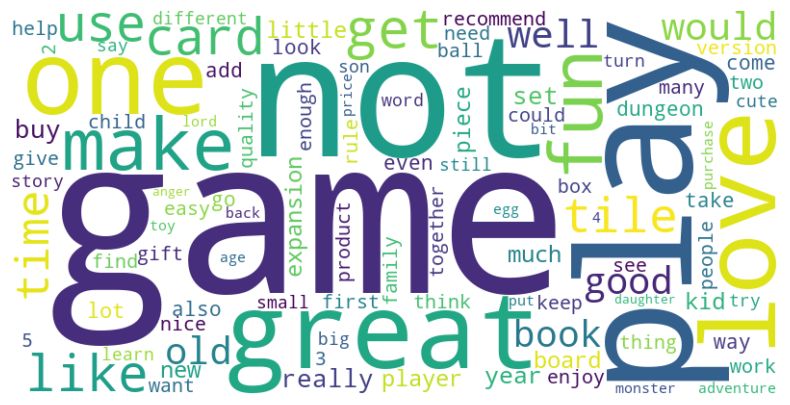

In [74]:
# Wordcloud from lemmatized review column
word_cloud(reviews_token['lemmatized_review'])

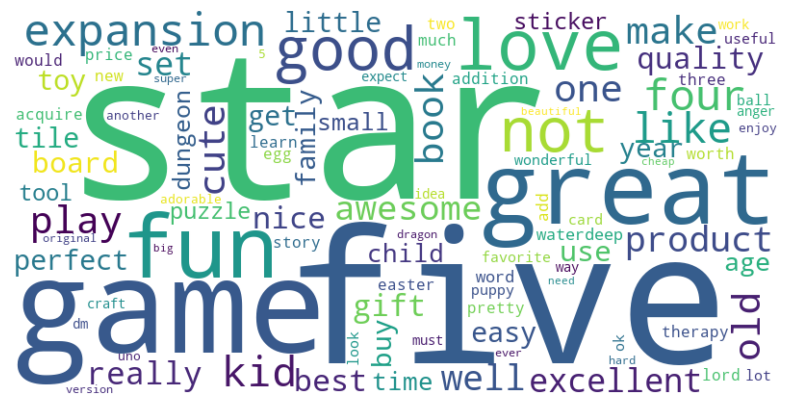

In [75]:
# Wordcloud from tokenized summary column
word_cloud(reviews_token['lemmatized_summary'])

**Both wordclouds highlight some of the same positive words (game, fun, love). Assuming that five stars is the highest rating a product can receive, the summary text appears to have a postive sentiment. While the word "not" seems negative, it is difficult to determine out of context. These visualisations are not very informative and I would only provide them to a stakeholder at their request.**

### Frequency Distribution

In [76]:
# Determine frequency distribution for review words

# Make a list of all lemmatized words
all_words_review = [word for word_list in reviews_lemmatized['lemmatized_review'] for word in word_list]

# Create a frequency distribution object
freq_dist_of_words = FreqDist(all_words_review)

# Show the five most common elements in the data set
freq_dist_of_words.most_common(15)

[('game', 1992),
 ('not', 1116),
 ('play', 926),
 ('great', 607),
 ('one', 580),
 ('love', 572),
 ('make', 565),
 ('fun', 558),
 ('get', 530),
 ('like', 464),
 ('card', 440),
 ('use', 439),
 ('tile', 402),
 ('time', 365),
 ('would', 357)]

In [77]:
# Determine frequency distribution summary words

# Make a list of all lemmatized words
all_words_summary = [word for word_list in reviews_lemmatized['lemmatized_summary'] for word in word_list]

# Create a frequency distribution object
freq_dist_of_words = FreqDist(all_words_summary)

# Show the five most common elements in the data set
freq_dist_of_words.most_common(15)

[('star', 478),
 ('five', 381),
 ('game', 335),
 ('great', 296),
 ('fun', 218),
 ('love', 136),
 ('not', 98),
 ('good', 95),
 ('expansion', 62),
 ('four', 58),
 ('like', 56),
 ('kid', 53),
 ('book', 46),
 ('cute', 45),
 ('make', 45)]

**Additional words that seem positive in these lists are "good", "like", and "cute". There are several neutral words but no obviously negative words in these lists, not notwithstanding.**

### Review Polarity and Sentiment

**I'm using the Vader library for sentiment analysis because it is specifically designed to handle informal online text like you find in product reviews.**

In [78]:
# Create a variable sia to store the SentimentIntensityAnalyser() method.
sia = SentimentIntensityAnalyzer()

In [79]:
# Run through a dictionary comprehension to take every cleaned comment
# Next run the polarity score function on the string.
# This will return four values in a dictionary

df_polarity_review = {" ".join(_) : sia.polarity_scores(" ".join(_)) for _ in reviews_lemmatized['lemmatized_review']}

In [80]:
# Convert the list of dictionary results to a Pandas DataFrame.
# The index is the cleaned review
polarity_review = pd.DataFrame(df_polarity_review).T

# View the DataFrame.
polarity_review

,neg,neu,pos,compound
come dm screen space screen absolute premium fact 50 space waste art not terribly informative need art well make completely useless reason give 2 star not 1 technically speak least still stand block note dice roll drop ball completely,0.232,0.661,0.107,-0.7067
open letter galeforce9 unpainted miniature not bad spell card great board game meh dm screen however freak terrible still wait single screen not polluted pointless artwork useful reference able table create single use screen useful run storm king thunder adventure even despite fact gear adventure path usefulness negligible best massive swath inner panel waste artwork bloat overland map could easily reduce single panel size table nigh useless short stop make crap dm screen,0.171,0.532,0.297,0.9190
nice art nice printing two panel fill general forgotten realm map beyond one blue ocean waste not understand can not make dm screen useful kind adventure rather solely specific adventure suppose able transpose adventure land outside forgotten realm even list new monster npcs would least useful map even would stuff related run game broad use stuff related giant thing curse strahd not make useful raven loft undead horror campaign general instead huge amount screen space solely map castle ravenloft useful small fraction time even curse strahd adventure let alone various ravenloft adventure really kill extend use screen not think potential use adventure question well use broad sense rage demon screen far useful broad dark adventure cover lot rule various condition may suffer map one panel storm giants one decent table include really miss mark maybe ask dm would use,0.176,0.581,0.243,0.8268
amaze buy buy gift new dm perfect,0.000,0.284,0.716,0.8779
review gf9 previous screen completely unnecessary nearly useless skip definition waste money,0.370,0.630,0.000,-0.7063
...,...,...,...,...
retired find great way stay alert spell vocabulary also need use math keep score great game brain,0.000,0.574,0.426,0.8860
perfect word game mixed age mom perhaps give little help 7 yr old age 80 8 love,0.000,0.538,0.462,0.8836
great game not think would like first receive turned lot fun play regularly order extra set always travel stuff,0.078,0.557,0.364,0.8267
great game keep mind nimble,0.000,0.494,0.506,0.6249


**A quick sense check suggests that many of the compound scores accurately reflect the sentiment of the reviews, but the second and third reviews have a positive compound score but seem negative to me.**

In [81]:
# Run through a dictionary comprehension to take every cleaned comment
# Next run the polarity score function on the string.
# This will return four values in a dictionary

df_polarity_summary = {" ".join(_) : sia.polarity_scores(" ".join(_)) for _ in reviews_lemmatized['lemmatized_summary']}

In [82]:
# Convert the list of dictionary results to a Pandas DataFrame.
# The index is the cleaned summary
# We can see some of the highly positive words. 
polarity_summary = pd.DataFrame(df_polarity_summary).T

# View the DataFrame.
polarity_summary

,neg,neu,pos,compound
fact 50 space waste art not terribly informative need art,0.204,0.583,0.213,0.0320
another worthless dungeon master screen galeforce9,0.367,0.633,0.000,-0.4404
pretty also pretty useless,0.275,0.098,0.627,0.5574
five star,0.000,1.000,0.000,0.0000
money trap,0.697,0.303,0.000,-0.3182
...,...,...,...,...
fun card game people like word,0.000,0.408,0.592,0.7003
sort card game equivalent scrabble lot easy,0.000,0.674,0.326,0.4404
great game keep mind active,0.000,0.306,0.694,0.7783
great mind game,0.000,0.328,0.672,0.6249


**The compound scores for shorter summaries seem less accurate than those for the reviews. For example, the fourth summary is "five stars", which sounds positive (and the corresponding review contains the words "amaze" and "perfect"), but it has a neutral score. That said, the summary of the second review has a negative score, which seems more accurate than the positive score given to the review itself.**

In [83]:
# Add a sentiment category column based on review compound score
polarity_review['sentiment'] = polarity_review.apply(lambda row: sentiment_cat(row['compound']), axis = 1)
polarity_review

,neg,neu,pos,compound,sentiment
come dm screen space screen absolute premium fact 50 space waste art not terribly informative need art well make completely useless reason give 2 star not 1 technically speak least still stand block note dice roll drop ball completely,0.232,0.661,0.107,-0.7067,negative
open letter galeforce9 unpainted miniature not bad spell card great board game meh dm screen however freak terrible still wait single screen not polluted pointless artwork useful reference able table create single use screen useful run storm king thunder adventure even despite fact gear adventure path usefulness negligible best massive swath inner panel waste artwork bloat overland map could easily reduce single panel size table nigh useless short stop make crap dm screen,0.171,0.532,0.297,0.9190,positive
nice art nice printing two panel fill general forgotten realm map beyond one blue ocean waste not understand can not make dm screen useful kind adventure rather solely specific adventure suppose able transpose adventure land outside forgotten realm even list new monster npcs would least useful map even would stuff related run game broad use stuff related giant thing curse strahd not make useful raven loft undead horror campaign general instead huge amount screen space solely map castle ravenloft useful small fraction time even curse strahd adventure let alone various ravenloft adventure really kill extend use screen not think potential use adventure question well use broad sense rage demon screen far useful broad dark adventure cover lot rule various condition may suffer map one panel storm giants one decent table include really miss mark maybe ask dm would use,0.176,0.581,0.243,0.8268,positive
amaze buy buy gift new dm perfect,0.000,0.284,0.716,0.8779,positive
review gf9 previous screen completely unnecessary nearly useless skip definition waste money,0.370,0.630,0.000,-0.7063,negative
...,...,...,...,...,...
retired find great way stay alert spell vocabulary also need use math keep score great game brain,0.000,0.574,0.426,0.8860,positive
perfect word game mixed age mom perhaps give little help 7 yr old age 80 8 love,0.000,0.538,0.462,0.8836,positive
great game not think would like first receive turned lot fun play regularly order extra set always travel stuff,0.078,0.557,0.364,0.8267,positive
great game keep mind nimble,0.000,0.494,0.506,0.6249,positive


In [84]:
# Add a sentiment category column based on summary compound score
polarity_summary['sentiment'] = polarity_summary.apply(lambda row: sentiment_cat(row['compound']), axis = 1)
polarity_summary

,neg,neu,pos,compound,sentiment
fact 50 space waste art not terribly informative need art,0.204,0.583,0.213,0.0320,neutral
another worthless dungeon master screen galeforce9,0.367,0.633,0.000,-0.4404,negative
pretty also pretty useless,0.275,0.098,0.627,0.5574,positive
five star,0.000,1.000,0.000,0.0000,neutral
money trap,0.697,0.303,0.000,-0.3182,negative
...,...,...,...,...,...
fun card game people like word,0.000,0.408,0.592,0.7003,positive
sort card game equivalent scrabble lot easy,0.000,0.674,0.326,0.4404,positive
great game keep mind active,0.000,0.306,0.694,0.7783,positive
great mind game,0.000,0.328,0.672,0.6249,positive


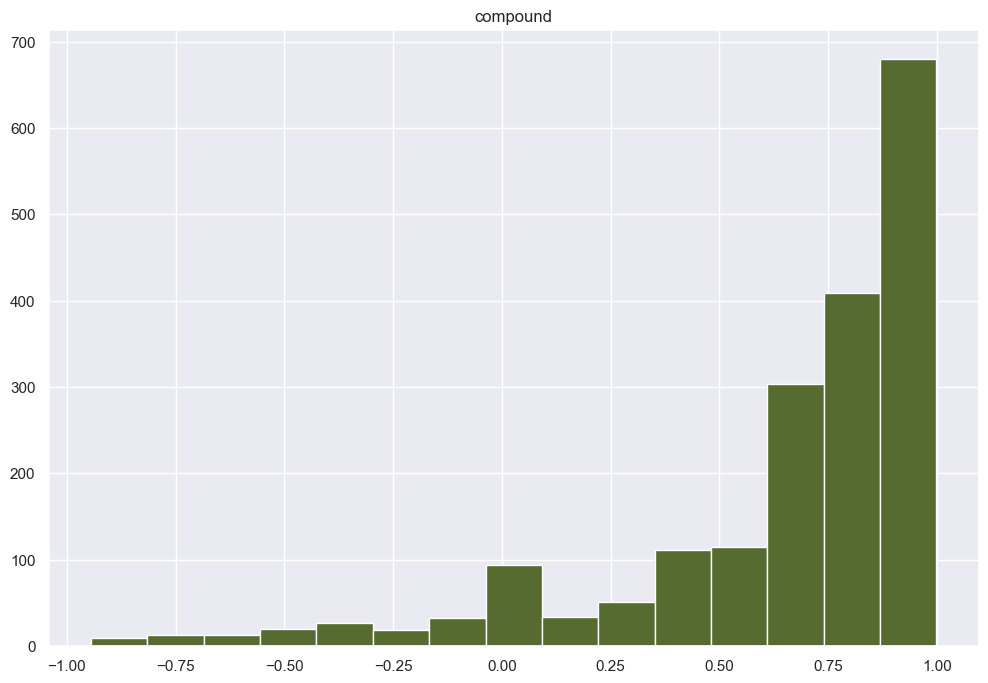

In [85]:
# Histogram of review compound scores
polarity_review['compound'].sort_values().reset_index().hist(bins=15, color='darkolivegreen')
plt.savefig('review_sentiment_hist.png')

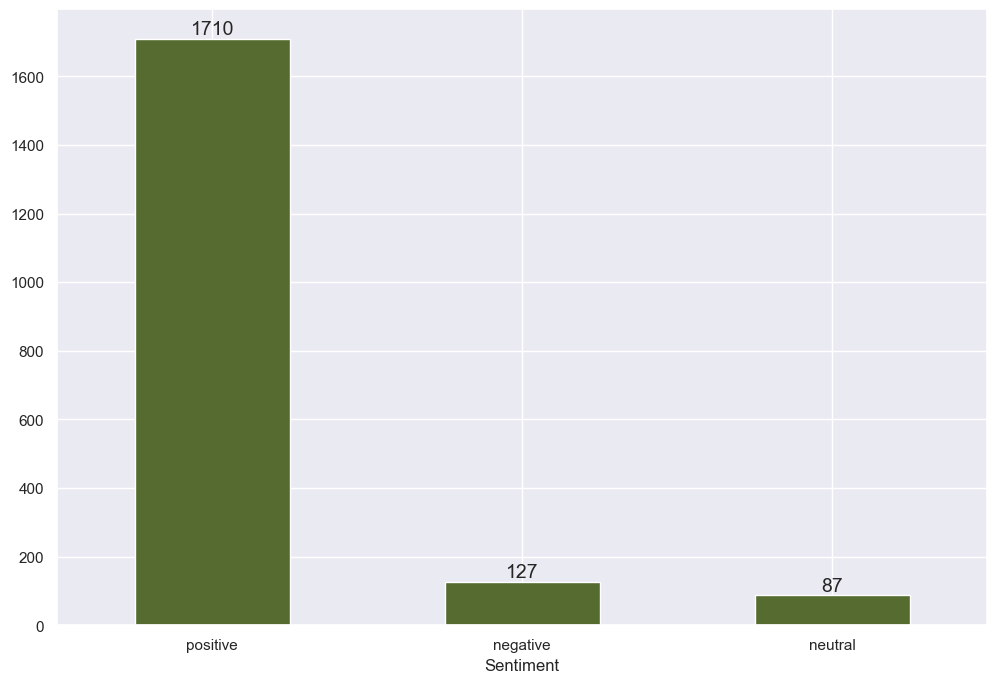

In [86]:
# Bar plot of review sentiment count
ax = polarity_review['sentiment'].value_counts().plot.bar(rot=0, color='darkolivegreen')
ax.bar_label(ax.containers[0], fontsize=14)
ax.set_xlabel("Sentiment")
plt.savefig('review_sentiment.png')

array([[<Axes: title={'center': 'compound'}>]], dtype=object)

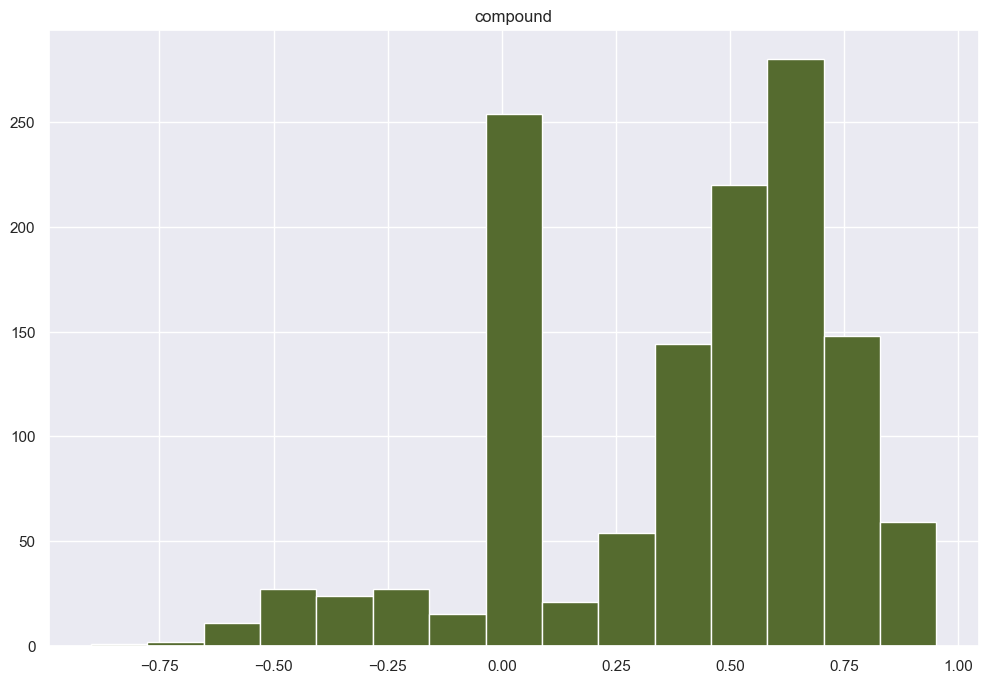

In [87]:
# Histogram of summary compound scores
polarity_summary['compound'].sort_values().reset_index().hist(bins=15, color='darkolivegreen')

[Text(0, 0, '933'), Text(0, 0, '247'), Text(0, 0, '107')]

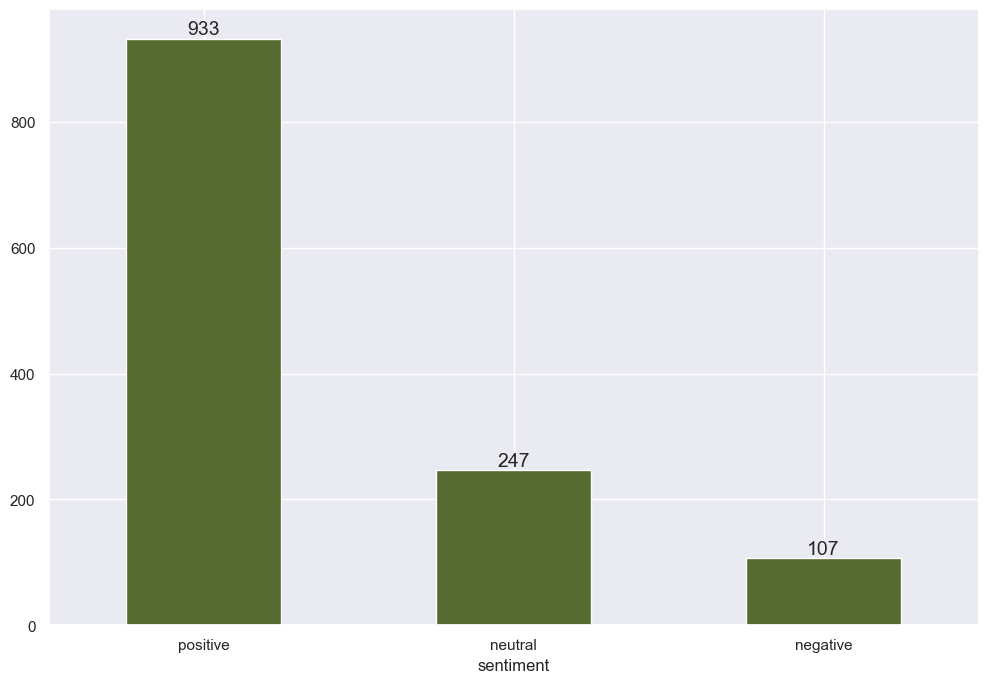

In [88]:
# Bar plot of summary sentiment count
ax = polarity_summary['sentiment'].value_counts().plot.bar(rot=0, color='darkolivegreen',)
ax.bar_label(ax.containers[0], fontsize=14)

**The good news is that an overwhelming number of the reviews (89%) and summaries (72%) are positive. I'm guessing that the relatively high number of neutral summaries is due to the fact that they might a star rating that cannot be interpreted accurately by the NLP.**

### Top 20 positive and negative reviews

In [89]:
# Top 20 positive reviews.
polarity_review.sort_values(by='compound', ascending=False).head(20)

neg    neu    pos  \
disclaimer buy local store pay list value suppo...  0.059  0.688  0.253   
whenever see game shelf get disturb visual quar...  0.033  0.782  0.185   
employ one creativity enhance resource rest lif...  0.073  0.666  0.261   
lord waterdeep awesome scoundrel skullport make...  0.084  0.684  0.232   
middle age married guy love sci fi video game f...  0.114  0.624  0.262   
dad two boy always lookout activity u together ...  0.039  0.693  0.268   
lord waterdeep scoundrel skullport expansion or...  0.034  0.694  0.272   
kit awesome 5 year old daughter make chihuahua ...  0.078  0.593  0.330   
grow play monopoly lot people unfortunate gem s...  0.026  0.730  0.244   
not know ever take delight realize tile availab...  0.102  0.668  0.230   
fan dungeon dragon adventure exploration game d...  0.090  0.614  0.296   
bought game impulse buy barnes noble could not ...  0.019  0.510  0.471   
nice good good great quick ship awesome good ni...  0.000  0.032  0.968   
skeptical castle ravenloft despite receive most...  0.069  0.652  0.280   
doctor card game create martin wallace publish ...  0.105  0.627  0.268   
ordered item gift wife christmas since enjoy pl...  0.021  0.532  0.446   
unexpectedly come across picture buckley first ...  0.058  0.620  0.323   
everyone love ball whack anytime lay around ine...  0.022  0.401  0.577   
first thing anyone see first time go say quickl...  0.000  0.721  0.279   
group friends gather weekly play board game ori...  0.000  0.561  0.439   

                                                    compound sentiment  
disclaimer buy local store pay list value suppo...    0.9990  positive  
whenever see game shelf get disturb visual quar...    0.9990  positive  
employ one creativity enhance resource rest lif...    0.9989  positive  
lord waterdeep awesome scoundrel skullport make...    0.9985  positive  
middle age married guy love sci fi video game f...    0.9983  positive  
dad two boy always lookout activity u together ...    0.9982  positive  
lord waterdeep scoundrel skullport expansion or...    0.9982  positive  
kit awesome 5 year old daughter make chihuahua ...    0.9979  positive  
grow play monopoly lot people unfortunate gem s...    0.9969  positive  
not know ever take delight realize tile availab...    0.9968  positive  
fan dungeon dragon adventure exploration game d...    0.9966  positive  
bought game impulse buy barnes noble could not ...    0.9961  positive  
nice good good great quick ship awesome good ni...    0.9960  positive  
skeptical castle ravenloft despite receive most...    0.9958  positive  
doctor card game create martin wallace publish ...    0.9957  positive  
ordered item gift wife christmas since enjoy pl...    0.9956  positive  
unexpectedly come across picture buckley first ...    0.9954  positive  
everyone love ball whack anytime lay around ine...    0.9953  positive  
first thing anyone see first time go say quickl...    0.9952  positive  
group friends gather weekly play board game ori...    0.9951  positive

In [90]:
# Top 20 negative reviews.
polarity_review.sort_values(by='compound').head(20)

,neg,neu,pos,compound,sentiment
find card game opposite intend actually kid focus way get angry etc instead teach calm act well really tested sale well game would calm dragon tried game kid absolutely behavior anger problem begin behave badly get angry second round not recommend therapist work kid anger issue day long think might good tool wrong,0.333,0.516,0.151,-0.9445,negative
crappy cardboard ghost original hard believe shame hasbro disgust,0.730,0.153,0.117,-0.9001,negative
really uno type game anger control stuff not like due young child really not respond well anger management technique well expectation management instead ok would not buy,0.371,0.570,0.060,-0.8877,negative
one bad game ever play basically come pun spot not pun generally pretty bad generate pun bad run mill groaner can not imagine many people enjoy slow pace generally not generate level enjoyment unless skilled english language,0.311,0.581,0.108,-0.8873,negative
hated product predictable not fun attempt fast setup table top game feel mesh together mess crap often time thought seem like battle kid never play one play would not recommend old game group enjoy board card ga e like talisman 7 wonder ascension f,0.348,0.485,0.167,-0.8684,negative
uno question anger okay way discus anger get repetitive student start get bored half round,0.491,0.427,0.081,-0.8625,negative
buy think would really fun disappointed really messy not nearly easy seem also glue useless 9 year old instruction difficult,0.455,0.427,0.118,-0.8513,negative
ball whack valuable tool distraction refocus mind pain due illness disease teenage son suffer condition cause intermittent pain anxiety distress continually look something occupy attention painful time noticed mild moderate pain play ball whack beautifully distract face relaxes engage creativity reactivity pain seemingly allow body regroup pain often dissapates suggest ball whack broadly consider tool pain management certain people condition could also imagine usefulness hospital clinic setting like individual wait undergo chemotherapy grateful addition wholistic care son,0.317,0.425,0.258,-0.8481,negative
horrible direction hard child read comprehend yarn make mess daughter excite get cry could not understand make would not recommend anyone,0.411,0.488,0.101,-0.8181,negative
dig shame 5 6 year ago not run rpgs probably would tile already set versatile really enhance battle mat player glad still reasonably price get 2 master set find amazon box come even wilderness tile potentially multi level terrain also cut bit setting random story encounter usuallydraw battle map large grid map happen able drop terrain might need,0.199,0.730,0.071,-0.8104,negative


### Top 20 positive and negative summaries

In [91]:
# Top 20 positive summaries.
polarity_summary.sort_values(by='compound', ascending=False).head(20)

,neg,neu,pos,compound,sentiment
wow great set tile great price great starter set,0.0,0.237,0.763,0.9524,positive
great play great creative workshop,0.0,0.069,0.931,0.9260,positive
love sticker love peppa perfect,0.0,0.142,0.858,0.9201,positive
wrath ashardalon great investment avid rpg fan enjoy tabletop well crpgs,0.0,0.302,0.698,0.9169,positive
easy learn great fun play,0.0,0.073,0.927,0.9136,positive
probably single best great beginner friendly game,0.0,0.258,0.742,0.9100,positive
excellent sticker grand daughter love peppa pig,0.0,0.268,0.732,0.8979,positive
great quality cute perfect toddler,0.0,0.156,0.844,0.8957,positive
easy fun fast thoroughly enjoyable adult well kid age eight,0.0,0.338,0.662,0.8947,positive
love construction vehicle sure love also,0.0,0.219,0.781,0.8934,positive


In [92]:
# Top 20 negative summaries.
polarity_summary.sort_values(by='compound').head(20)

,neg,neu,pos,compound,sentiment
crappy cardboard ghost original hard believe shame hasbro disgust,0.730,0.153,0.117,-0.9001,negative
tardis doctor river song amy rory fight every enemy card,0.433,0.567,0.000,-0.7269,negative
defective poor qc,0.857,0.143,0.000,-0.7184,negative
find board game dumb bore,0.639,0.361,0.000,-0.6486,negative
20 side die,0.661,0.339,0.000,-0.5994,negative
box totally destroy,0.655,0.345,0.000,-0.5849,negative
game simple would not fun play not,0.487,0.513,0.000,-0.5773,negative
add need amount tension tense fantasy world,0.485,0.515,0.000,-0.5719,negative
anger control game,0.649,0.351,0.000,-0.5719,negative
not interest inspire maybe okay cover basic,0.481,0.352,0.167,-0.5541,negative


**At the extreme ends of the compound score spectrum the sentiment analysis appears to be accurate for both reviews and summaries.**

### Relationship between Loyalty Points and Sentiment

**Are customers with lots of loyalty points more likely to leave negative reviews (because they have higher expectations)?**

In [93]:
# new dataframe with original data and sentiment analysis scores
reviews_analyzed = reviews_lemmatized
reviews_analyzed['compound_review'] = reviews_lemmatized['lemmatized_review'].apply(lambda x: sia.polarity_scores(" ".join(x))['compound'])
reviews_analyzed['neg_review'] = reviews_lemmatized['lemmatized_review'].apply(lambda x: sia.polarity_scores(" ".join(x))['neg'])
reviews_analyzed['neu_review'] = reviews_lemmatized['lemmatized_review'].apply(lambda x: sia.polarity_scores(" ".join(x))['neu'])
reviews_analyzed['pos_review'] = reviews_lemmatized['lemmatized_review'].apply(lambda x: sia.polarity_scores(" ".join(x))['pos'])
reviews_analyzed['compound_summary'] = reviews_lemmatized['lemmatized_summary'].apply(lambda x: sia.polarity_scores(" ".join(x))['compound'])
reviews_analyzed['neg_summary'] = reviews_lemmatized['lemmatized_summary'].apply(lambda x: sia.polarity_scores(" ".join(x))['neg'])
reviews_analyzed['neu_summary'] = reviews_lemmatized['lemmatized_summary'].apply(lambda x: sia.polarity_scores(" ".join(x))['neu'])
reviews_analyzed['pos_summary'] = reviews_lemmatized['lemmatized_summary'].apply(lambda x: sia.polarity_scores(" ".join(x))['pos'])

# View the updated DataFrame with sentiment scores
reviews_analyzed.head()

,income,spending_score,gender,age,loyalty_points,education,product,review,summary,kmeans_cluster,...,lemmatized_summary,lemmatized_review,compound_review,neg_review,neu_review,pos_review,compound_summary,neg_summary,neu_summary,pos_summary
0,12.30,39,Male,18,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,4,...,"[fact, 50, space, waste, art, not, terribly, i...","[come, dm, screen, space, screen, absolute, pr...",-0.7067,0.232,0.661,0.107,0.0320,0.204,0.583,0.213
1,12.30,81,Male,23,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,3,...,"[another, worthless, dungeon, master, screen, ...","[open, letter, galeforce9, unpainted, miniatur...",0.9190,0.171,0.532,0.297,-0.4404,0.367,0.633,0.000
2,13.12,6,Female,22,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",4,...,"[pretty, also, pretty, useless]","[nice, art, nice, printing, two, panel, fill, ...",0.8268,0.176,0.581,0.243,0.5574,0.275,0.098,0.627
3,13.12,77,Female,25,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars,3,...,"[five, star]","[amaze, buy, buy, gift, new, dm, perfect]",0.8779,0.000,0.284,0.716,0.0000,0.000,1.000,0.000
4,13.94,40,Female,33,366,graduate,291,As my review of GF9's previous screens these w...,Money trap,4,...,"[money, trap]","[review, gf9, previous, screen, completely, un...",-0.7063,0.370,0.630,0.000,-0.3182,0.697,0.303,0.000


In [94]:
# Add a sentiment_review column based on review compound score
reviews_analyzed['sentiment_review'] = reviews_analyzed.apply(lambda row: sentiment_cat(row['compound_review']), axis = 1)

# Add a sentiment_summary column based on summary compound score
reviews_analyzed['sentiment_summary'] = reviews_analyzed.apply(lambda row: sentiment_cat(row['compound_summary']), axis = 1)

# View dataframe
reviews_analyzed

,income,spending_score,gender,age,loyalty_points,education,product,review,summary,kmeans_cluster,...,compound_review,neg_review,neu_review,pos_review,compound_summary,neg_summary,neu_summary,pos_summary,sentiment_review,sentiment_summary
0,12.30,39,Male,18,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,4,...,-0.7067,0.232,0.661,0.107,0.0320,0.204,0.583,0.213,negative,neutral
1,12.30,81,Male,23,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,3,...,0.9190,0.171,0.532,0.297,-0.4404,0.367,0.633,0.000,positive,negative
2,13.12,6,Female,22,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",4,...,0.8268,0.176,0.581,0.243,0.5574,0.275,0.098,0.627,positive,positive
3,13.12,77,Female,25,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars,3,...,0.8779,0.000,0.284,0.716,0.0000,0.000,1.000,0.000,positive,neutral
4,13.94,40,Female,33,366,graduate,291,As my review of GF9's previous screens these w...,Money trap,4,...,-0.7063,0.370,0.630,0.000,-0.3182,0.697,0.303,0.000,negative,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,84.46,69,Female,37,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom,0,...,0.8836,0.000,0.538,0.462,0.5719,0.000,0.575,0.425,positive,positive
1996,92.66,8,Female,43,539,PhD,979,Great game. Did not think I would like it whe...,Super fun,2,...,0.8267,0.078,0.557,0.364,0.8020,0.000,0.000,1.000,positive,positive
1997,92.66,91,Male,34,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game,0,...,0.6249,0.000,0.494,0.506,0.6249,0.000,0.196,0.804,positive,positive
1998,98.40,16,Male,34,1048,PhD,1031,fun game!,Four Stars,2,...,0.5106,0.000,0.233,0.767,0.0000,0.000,1.000,0.000,positive,neutral


In [95]:
# Create CSV file as output.
reviews_analyzed.to_csv('reviews_analyzed.csv', index=False)

In [96]:
# Filter the DataFrame by a string value in the 'review' column
star_summary = reviews_analyzed[reviews_analyzed['summary'].str.contains('five stars', case=False)]

star_summary

,income,spending_score,gender,age,loyalty_points,education,product,review,summary,kmeans_cluster,...,compound_review,neg_review,neu_review,pos_review,compound_summary,neg_summary,neu_summary,pos_summary,sentiment_review,sentiment_summary
3,13.12,77,Female,25,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars,3,...,0.8779,0.0,0.284,0.716,0.0,0.0,1.0,0.0,positive,neutral
5,13.94,76,Female,24,573,PhD,977,Grandson loves,Five Stars,3,...,0.6369,0.0,0.192,0.808,0.0,0.0,1.0,0.0,positive,neutral
7,14.76,94,Female,25,772,graduate,1012,Came in perfect condition.,Five Stars,3,...,0.5719,0.0,0.351,0.649,0.0,0.0,1.0,0.0,positive,neutral
10,15.58,14,Male,69,138,diploma,1463,Works very well,Five Stars,4,...,0.2732,0.0,0.323,0.677,0.0,0.0,1.0,0.0,positive,neutral
15,16.40,79,Male,24,701,graduate,123,Very fun game for my family,Five Stars,3,...,0.5106,0.0,0.377,0.623,0.0,0.0,1.0,0.0,positive,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972,16.40,13,Male,38,149,graduate,453,OK,Five Stars,4,...,0.2960,0.0,0.000,1.000,0.0,0.0,1.0,0.0,positive,neutral
1973,16.40,79,Male,38,906,graduate,466,Great quick entertaining game. Love it!,Five Stars,3,...,0.9042,0.0,0.152,0.848,0.0,0.0,1.0,0.0,positive,neutral
1976,18.86,29,Male,57,398,graduate,291,It is great!!!,Five Stars,4,...,0.6249,0.0,0.000,1.000,0.0,0.0,1.0,0.0,positive,neutral
1985,92.66,8,Male,32,479,graduate,291,"such a fun game, our families favorite",Five Stars,2,...,0.7430,0.0,0.241,0.759,0.0,0.0,1.0,0.0,positive,neutral


**There are 379 summaries that contain the phrase "five stars" and they are given a neutral sentiment. For this reason, I will use the sentiment scores from the reviews, not the summaries.**

[Text(0.5, 0, 'Loyalty Points'), Text(0, 0.5, 'Sentiment')]

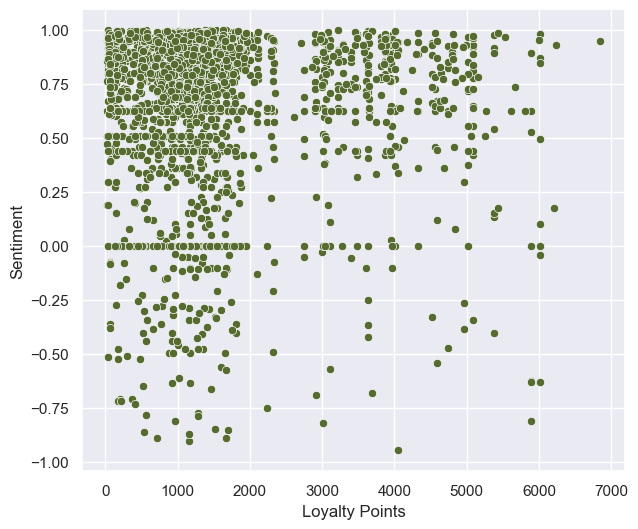

In [97]:
# Create a scatterplot with Seaborn.
plt.figure(figsize=(7, 6))
ax = sns.scatterplot(x='loyalty_points',
                y='compound_review',
                data=reviews_analyzed, color='darkolivegreen')
ax.set(xlabel='Loyalty Points', ylabel='Sentiment')


Predicted y values (head and tail):
[0.66113168 0.63027149 0.63626053 0.65130707 0.64668589]
...
[0.62790545 0.64942163 0.64845118 0.65327569 0.63193511] 

Mean Absolute Error: 0.28077737407022174
Mean Squared Error: 0.14682196427633146
Root Mean Squared Error: 0.38317354328858805
R-squared for training set:  0.10127769448600166
R-squared for test set:  -0.07636374788910771 

                            OLS Regression Results                            
Dep. Variable:        compound_review   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.620
Date:                Mon, 14 Apr 2025   Prob (F-statistic):              0.203
Time:                        14:24:17   Log-Likelihood:                -692.66
No. Observations:                1600   AIC:                             1389.
Df Residuals:                    1598   BIC:                        

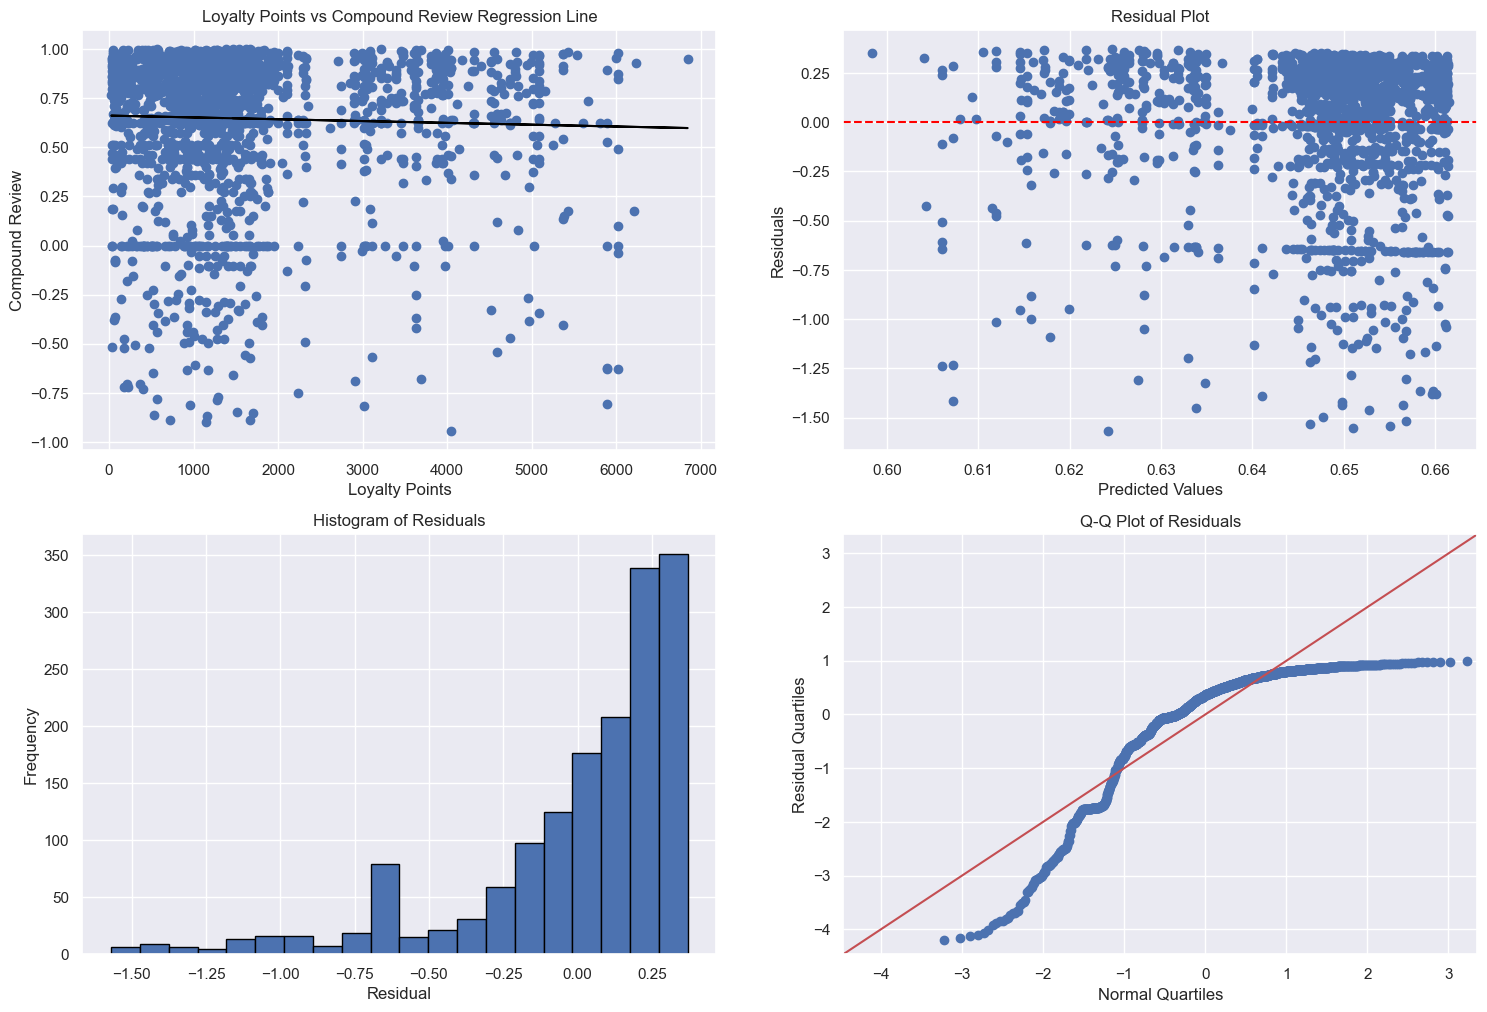

In [98]:
# Select x variables
X = ['loyalty_points']

# Run linear regression function
lin_reg(reviews_analyzed, X, 'compound_review')

**There does not appear to be a correlation between loyalty points and sentiment.**

### Further Analysis: Sentiment by Cluster

In [99]:
# Group by cluster_description and aggregate by median loyalty points
cluster_sentiment= reviews_analyzed.groupby(['cluster_description'])['compound_review'].mean().sort_values().reset_index()
cluster_sentiment

,cluster_description,compound_review
0,Low Income Low Spend,0.618269
1,High Income High Spend,0.627381
2,High Income Low Spend,0.628121
3,Low Income High Spend,0.635789
4,Middle Income Middle Spend,0.676891


In [100]:
cluster_sentiment = cluster_sentiment.round(decimals=3)

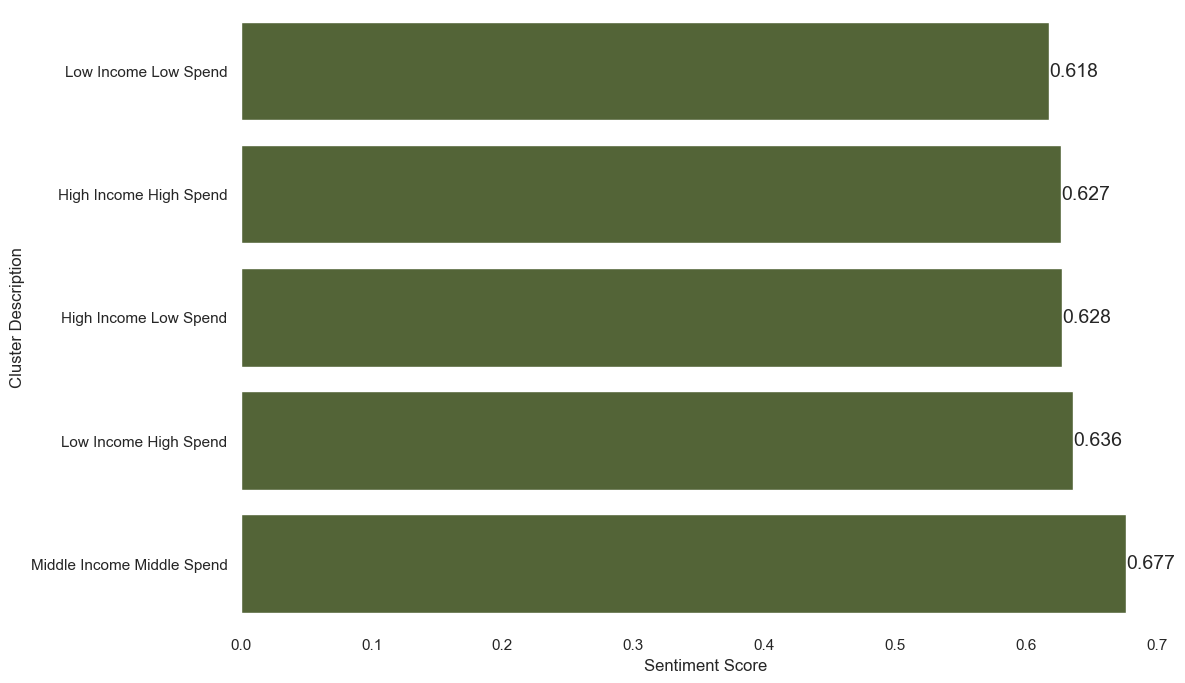

In [101]:
# Clean labels
clean_cluster = clean_label('cluster_description')
clean_compound = clean_label('sentiment score')

# Horizontal bar plot with value labels and no grid lines
ax = sns.barplot(cluster_sentiment, y="cluster_description", x="compound_review", orient="h", color='darkolivegreen')
ax.set_facecolor('white')
ax.bar_label(ax.containers[0], fontsize=14)
ax.set(xlabel=clean_compound, ylabel=clean_cluster)
ax.grid(False)

fig = ax.get_figure()
fig.savefig("cluster_loyalty.png", bbox_inches = "tight")

**Middle Income Middle Spending Score customers reviews are more postive on average compared to the other customer clusters.**

**Note: The following code to calculate percentages and plot them as a clustered bar graph was generated with the assistance of the Claude AI Chatbot.**

In [102]:
# Group by cluster and sentiment with a count column
sentiment_pcts = (reviews_analyzed
                 .groupby(['cluster_description', 'sentiment_review'])
                 .size()
                 .reset_index(name='count'))
sentiment_pcts

,cluster_description,sentiment_review,count
0,High Income High Spend,negative,23
1,High Income High Spend,neutral,18
2,High Income High Spend,positive,315
3,High Income Low Spend,negative,21
4,High Income Low Spend,neutral,15
5,High Income Low Spend,positive,294
6,Low Income High Spend,negative,17
7,Low Income High Spend,neutral,11
8,Low Income High Spend,positive,241
9,Low Income Low Spend,negative,20


In [103]:
# Calculate total count per cluster to find percentages
total_counts = sentiment_pcts.groupby('cluster_description')['count'].transform('sum')
sentiment_pcts['percentage'] = sentiment_pcts['count'] / total_counts * 100

# View dataframe
sentiment_pcts

,cluster_description,sentiment_review,count,percentage
0,High Income High Spend,negative,23,6.460674
1,High Income High Spend,neutral,18,5.056180
2,High Income High Spend,positive,315,88.483146
3,High Income Low Spend,negative,21,6.363636
4,High Income Low Spend,neutral,15,4.545455
5,High Income Low Spend,positive,294,89.090909
6,Low Income High Spend,negative,17,6.319703
7,Low Income High Spend,neutral,11,4.089219
8,Low Income High Spend,positive,241,89.591078
9,Low Income Low Spend,negative,20,7.380074


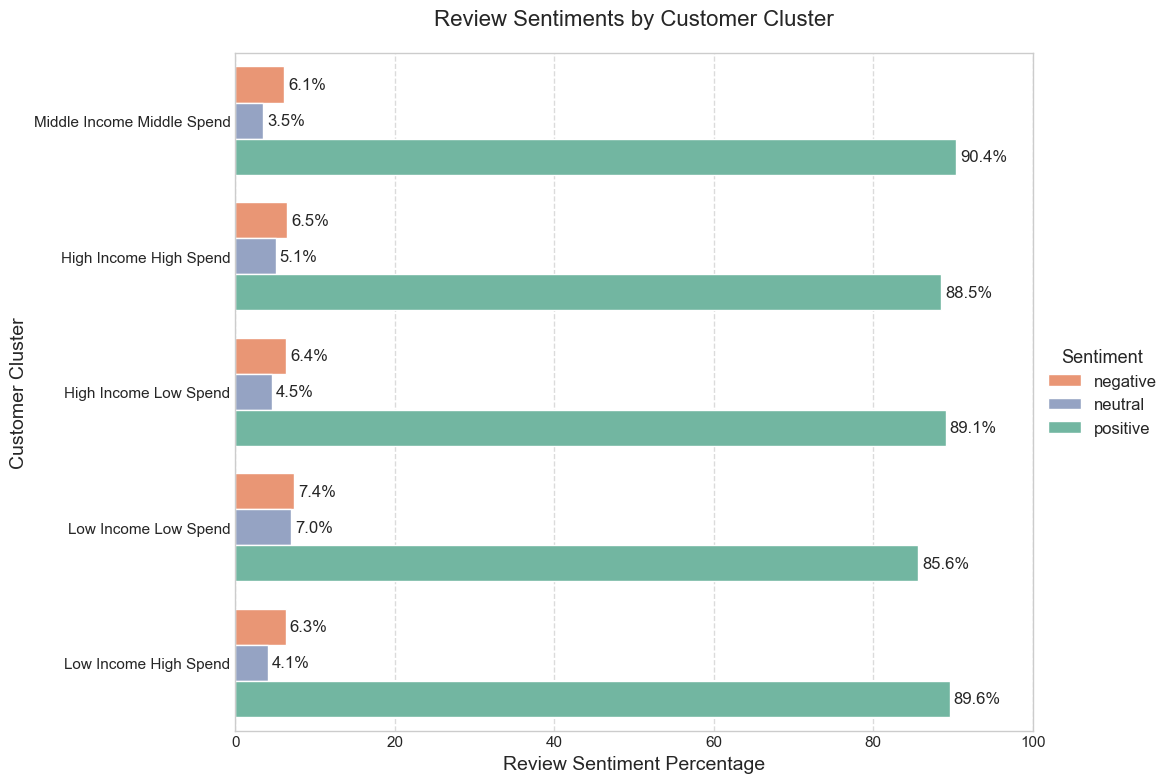

In [104]:
# Set the style
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(14, 8))  # Slightly wider to accommodate external legend

# Create a custom order for clusters
cluster_order = reviews_analyzed['cluster_description'].value_counts().index

# Create a colorblind-friendly palette
colorblind_palette = {'positive': '#66c2a5', 'neutral': '#8da0cb', 'negative': '#fc8d62'}

# Create the horizontal bar plot
ax = sns.barplot(
    x='percentage',
    y='cluster_description',
    hue='sentiment_review',
    data=sentiment_pcts,
    palette=colorblind_palette,
    order=cluster_order
)

# Customize the plot
plt.title('Review Sentiments by Customer Cluster', fontsize=16, pad=20)
plt.xlabel('Review Sentiment Percentage', fontsize=14)
plt.ylabel('Customer Cluster', fontsize=14)

# Move legend outside the plot
plt.legend(title='Sentiment', fontsize=12, title_fontsize=13, 
           loc='center left', bbox_to_anchor=(1, 0.5))

# Add percentage labels on the bars
for container in ax.containers:
    labels = [f'{val:.1f}%' for val in container.datavalues]
    ax.bar_label(container, labels=labels, padding=3)

# Set x-axis limit to 100%
plt.xlim(0, 100)

# Add grid lines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

fig = ax.get_figure()
fig.savefig("sentiment_percent.png", bbox_inches = "tight")

**Middle Income Middle Spending Score customers had the highest percentage of positive reviews and lowest percentage of negative and neutral reviews. Perhaps additional loyalty points could encourage them to make additional purchaes? Low Income Low Spending Score customers have the lowest percentage of postive reviews and the highest percentage of negative reviews. They could be most at risk to churn and additional loyalty points might help keep them as customers.** 